In [2]:
#Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

In [3]:
# Load the .csv file
df = pd.read_csv('Dataset_Moussa.csv')

# Preview the first few rows
print(df.head())

# Optional: View all column names
print(df.columns.tolist())


   Gender  Nationality  Age  F1  SP1  SP2  AT1  AT2  AT3  AT4  CT1  CT2  CT3  \
0       1            2    1   1    4    4    4    4    4    4    4    4    4   
1       2            2    1   1    4    2    6    4    2    3    5    2    4   
2       2            2    1   1    2    2    2    1    1    1    2    1    4   
3       2            1    1   1    5    3    5    6    5    6    6    5    5   
4       2            1    1   1    5    3    4    5    6    4    5    5    5   

   CT4  CT5  PI1  PI2  PI3  
0    4    4    4    4    4  
1    4    2    2    3    2  
2    3    3    5    4    5  
3    6    5    4    6    5  
4    5    5    5    5    5  
['Gender', 'Nationality', 'Age', 'F1', 'SP1', 'SP2', 'AT1', 'AT2', 'AT3', 'AT4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'PI1', 'PI2', 'PI3']


In [4]:
# Create a summary DataFrame for each column
variable_summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Num Unique': df.nunique(),
    'Missing Values': df.isnull().sum(),
    'Example Values': df.apply(lambda x: x.dropna().unique()[:5])
})

# Display the full summary
pd.set_option('display.max_rows', None)  # Show all rows
print(variable_summary)


            Data Type  Num Unique  Missing Values   Example Values
Gender          int64           2               0           [1, 2]
Nationality     int64           2               0           [2, 1]
Age             int64           4               0     [1, 2, 3, 4]
F1              int64           2               0           [1, 2]
SP1             int64           7               0  [4, 2, 5, 6, 3]
SP2             int64           8               0  [4, 2, 3, 5, 7]
AT1             int64           7               0  [4, 6, 2, 5, 7]
AT2             int64           7               0  [4, 1, 6, 5, 7]
AT3             int64           7               0  [4, 2, 1, 5, 6]
AT4             int64           7               0  [4, 3, 1, 6, 5]
CT1             int64           7               0  [4, 5, 2, 6, 7]
CT2             int64           7               0  [4, 2, 1, 5, 7]
CT3             int64           6               0  [4, 5, 7, 6, 3]
CT4             int64           6               0  [4, 3, 6, 5

In [5]:
# === Step 1: Define Variable Groups ===
nominal_vars = ['Gender', 'Nationality', 'F1']
ordinal_vars = [
    'Age',
    'SP1', 'SP2',
    'AT1', 'AT2', 'AT3', 'AT4',
    'CT1', 'CT2', 'CT3', 'CT4', 'CT5',
    'PI1', 'PI2', 'PI3'
]

# === Step 2: Generate Nominal Variable Frequency Tables ===
nominal_tables = {}
for var in nominal_vars:
    freq_table = df[var].value_counts(dropna=False).to_frame(name='Frequency')
    nominal_tables[var] = freq_table
    print(f"\n=== Frequency Table for {var} ===")
    print(freq_table)

# === Step 3: Generate Ordinal Variable Summary Table ===
ordinal_stats = pd.DataFrame({
    'Median': df[ordinal_vars].median(),
    'Mode': df[ordinal_vars].mode().iloc[0],
    'Min': df[ordinal_vars].min(),
    'Max': df[ordinal_vars].max()
}).round(2)

print("\n=== Ordinal Variables Summary Table ===")
print(ordinal_stats)


=== Frequency Table for Gender ===
        Frequency
Gender           
2             111
1              87

=== Frequency Table for Nationality ===
             Frequency
Nationality           
1                  186
2                   12

=== Frequency Table for F1 ===
    Frequency
F1           
1         139
2          59

=== Ordinal Variables Summary Table ===
     Median  Mode  Min  Max
Age     2.0     2    1    4
SP1     5.0     4    1    7
SP2     4.0     4    0    7
AT1     5.0     5    1    7
AT2     5.0     4    1    7
AT3     5.0     4    1    7
AT4     4.5     4    1    7
CT1     5.0     4    1    7
CT2     5.0     4    1    7
CT3     5.0     4    2    7
CT4     5.0     4    2    7
CT5     5.0     4    1    7
PI1     5.0     4    1    7
PI2     5.0     4    1    7
PI3     5.0     4    1    7


In [6]:
# Nominal variable list
nominal_vars = ['Gender', 'Nationality', 'F1']  # or any other nominal you confirmed

# Create a summary table for nominal variables
nominal_summary = []

for var in nominal_vars:
    freq = df[var].value_counts(dropna=False)
    percent = df[var].value_counts(normalize=True, dropna=False) * 100

    for cat in freq.index:
        nominal_summary.append({
            'Variable': var,
            'Category': cat,
            'Frequency': freq[cat],
            'Percentage': round(percent[cat], 1)
        })

# Convert to DataFrame
nominal_df = pd.DataFrame(nominal_summary)

# Display table
print("\n=== Nominal Variables Summary Table ===")
print(nominal_df)


=== Nominal Variables Summary Table ===
      Variable  Category  Frequency  Percentage
0       Gender         2        111        56.1
1       Gender         1         87        43.9
2  Nationality         1        186        93.9
3  Nationality         2         12         6.1
4           F1         1        139        70.2
5           F1         2         59        29.8


In [7]:
# --- ORDINAL TABLES ---
ordinal_summary = []

for var in ordinal_vars:
    freq = df[var].value_counts().sort_index()
    percent = df[var].value_counts(normalize=True).sort_index() * 100
    mean = round(df[var].mean(), 2)
    std = round(df[var].std(), 2)
    mean_std = f"{mean} ± {std}"

    for cat in freq.index:
        ordinal_summary.append({
            'Variable': var,
            'Response Category': cat,
            'Frequency': freq[cat],
            'Percentage': round(percent[cat], 1),
            'Mean ± SD': mean_std
        })

ordinal_df = pd.DataFrame(ordinal_summary)
print("\n=== Ordinal Variables Summary ===")
print(ordinal_df)


=== Ordinal Variables Summary ===
    Variable  Response Category  Frequency  Percentage    Mean ± SD
0        Age                  1         89        44.9  1.62 ± 0.64
1        Age                  2         98        49.5  1.62 ± 0.64
2        Age                  3          8         4.0  1.62 ± 0.64
3        Age                  4          3         1.5  1.62 ± 0.64
4        SP1                  1          1         0.5  4.65 ± 1.38
5        SP1                  2         11         5.6  4.65 ± 1.38
6        SP1                  3         27        13.6  4.65 ± 1.38
7        SP1                  4         55        27.8  4.65 ± 1.38
8        SP1                  5         51        25.8  4.65 ± 1.38
9        SP1                  6         30        15.2  4.65 ± 1.38
10       SP1                  7         23        11.6  4.65 ± 1.38
11       SP2                  0          2         1.0   4.3 ± 1.57
12       SP2                  1          8         4.0   4.3 ± 1.57
13       SP2 

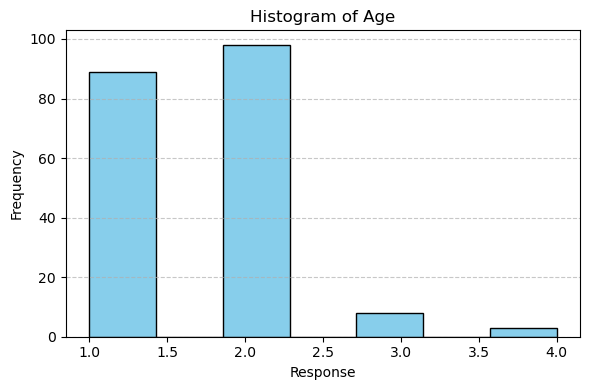

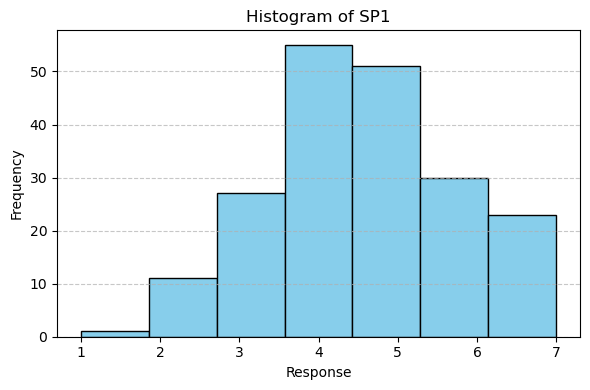

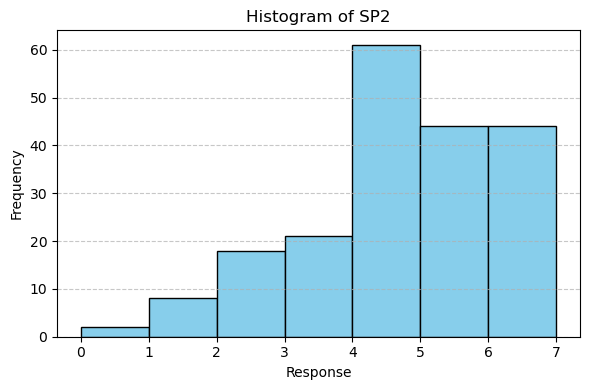

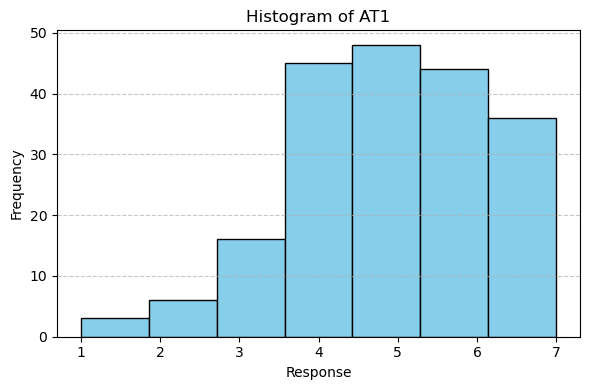

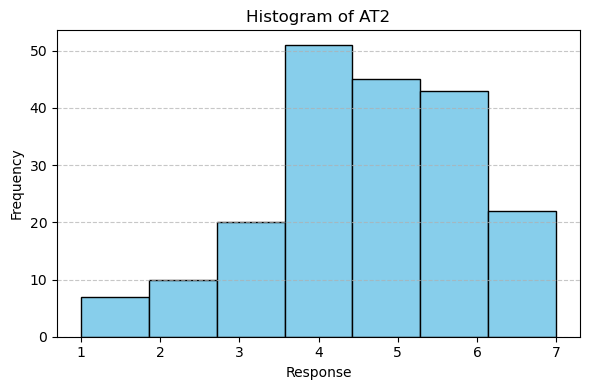

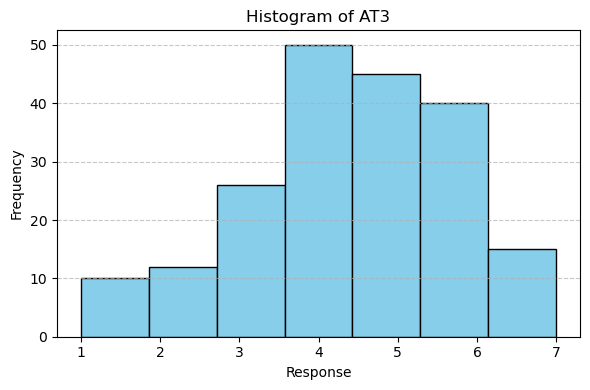

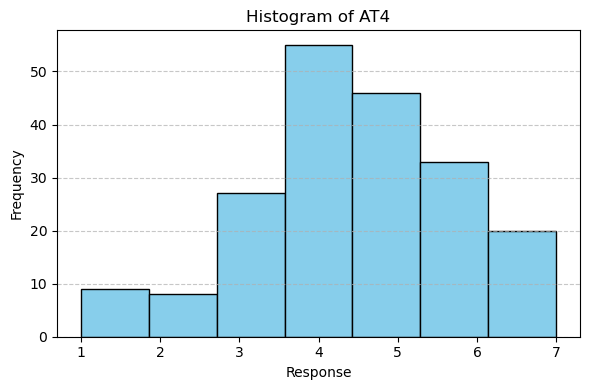

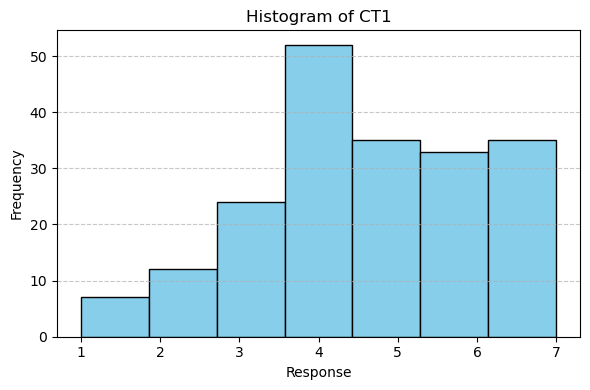

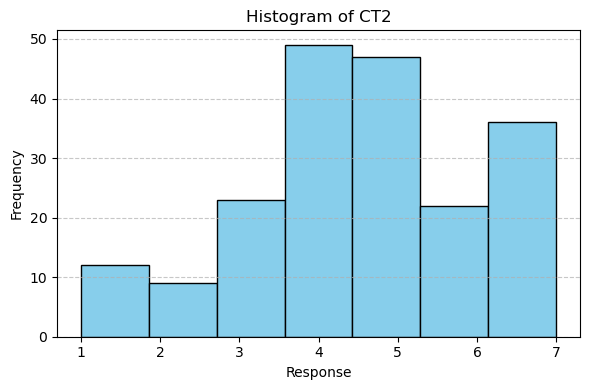

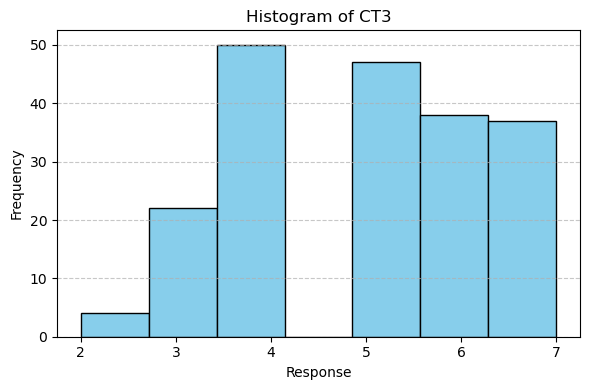

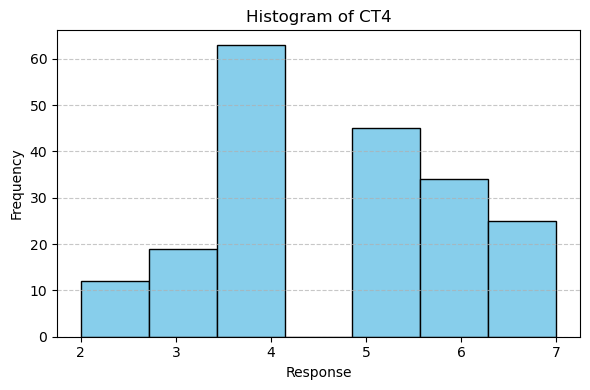

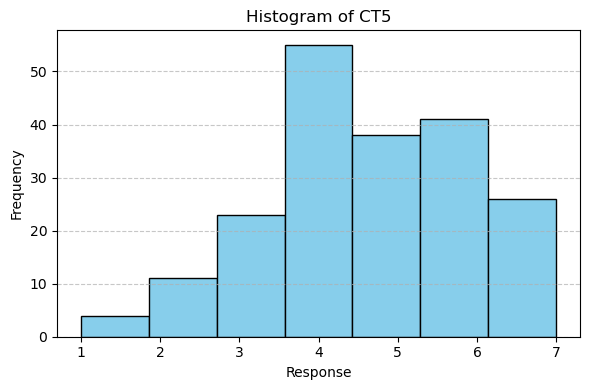

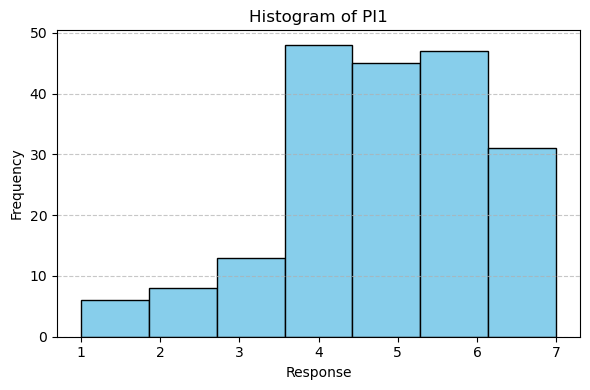

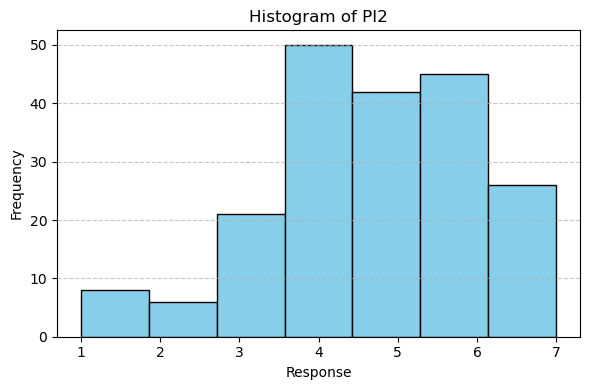

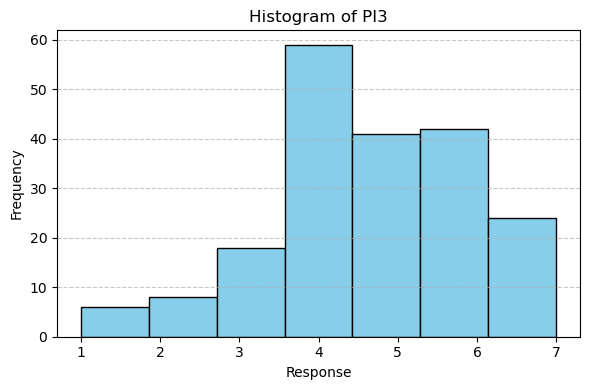

In [8]:
# Set up histogram plots
for var in ordinal_vars:
    plt.figure(figsize=(6, 4))
    plt.hist(df[var], bins=7, edgecolor='black', color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel('Response')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

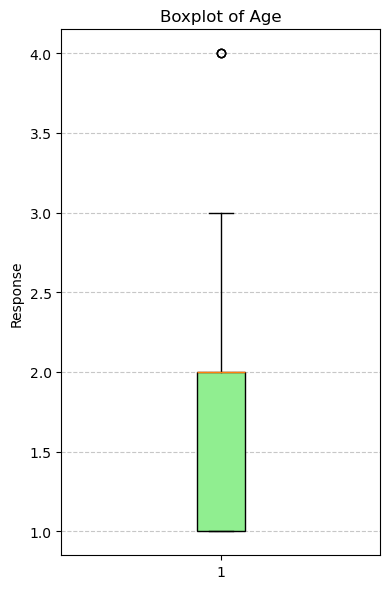

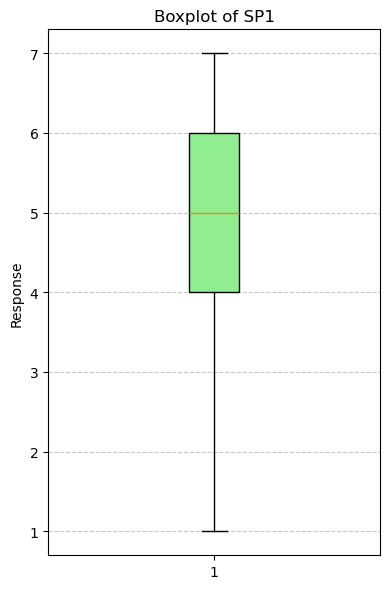

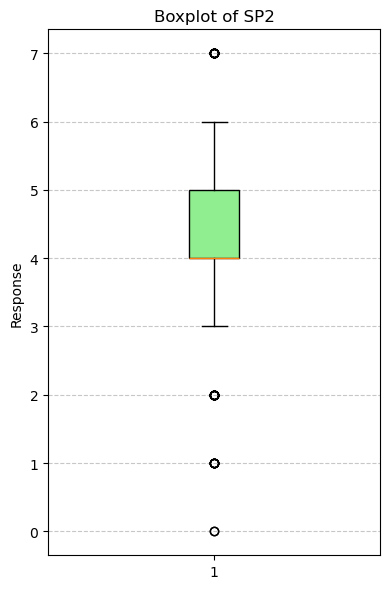

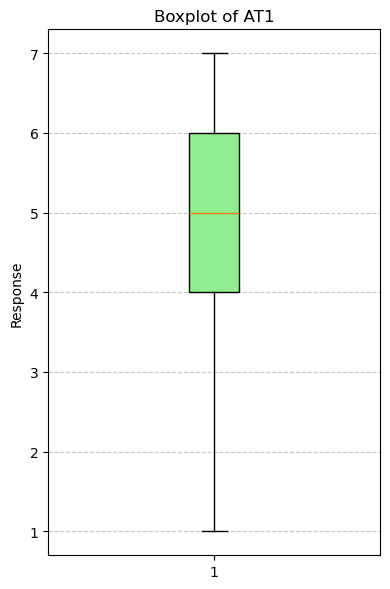

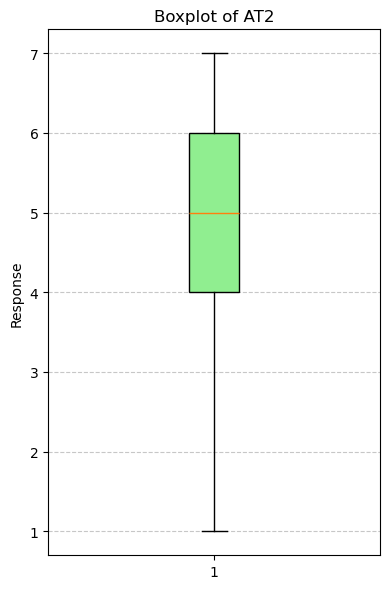

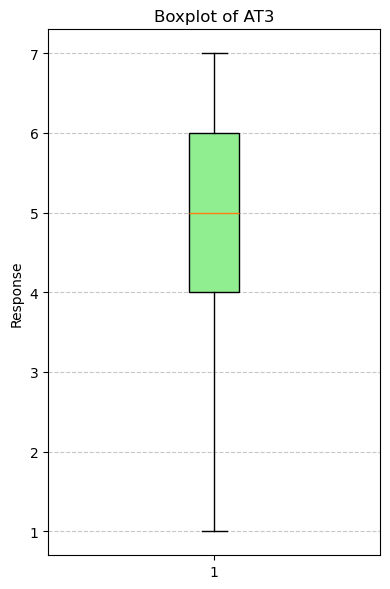

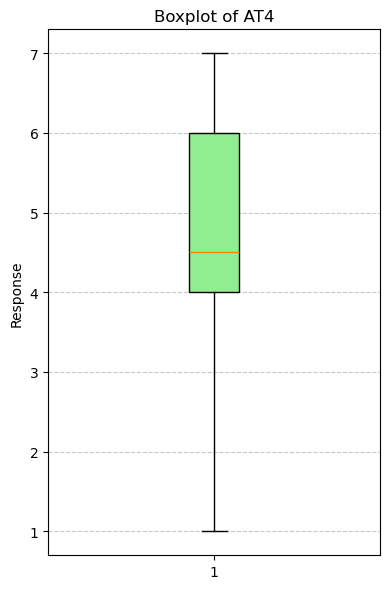

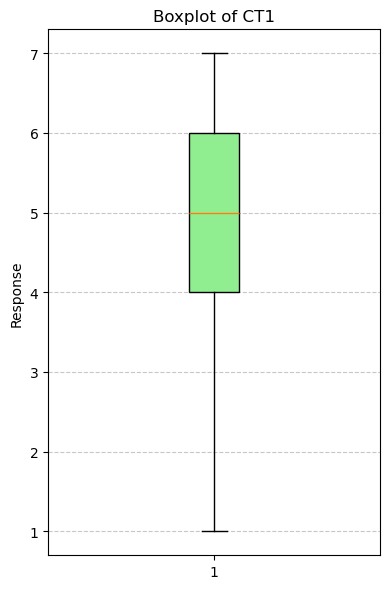

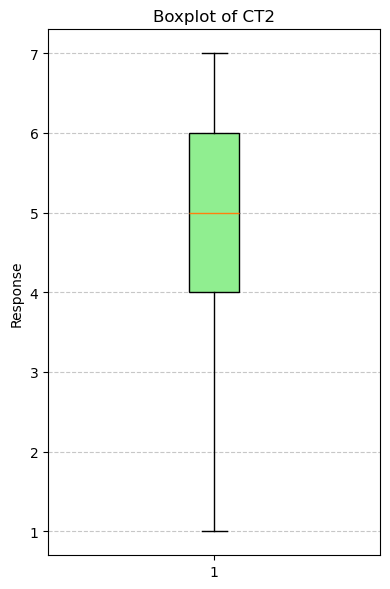

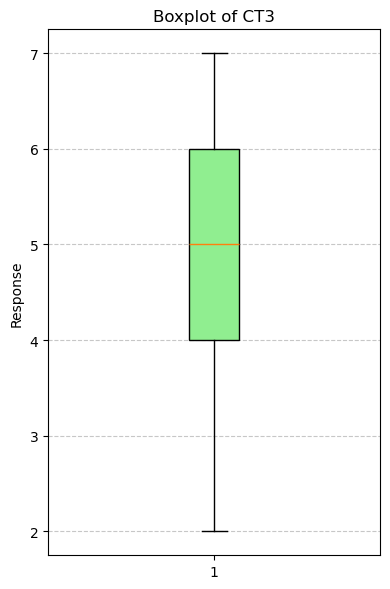

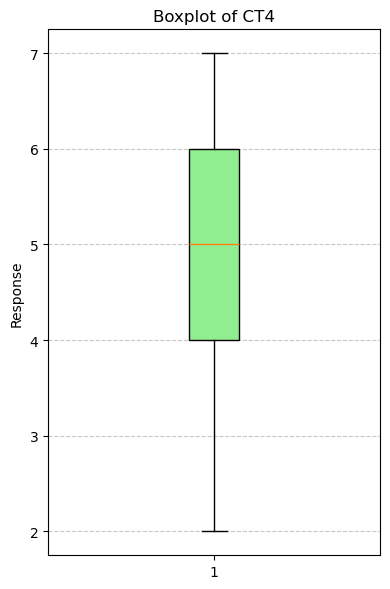

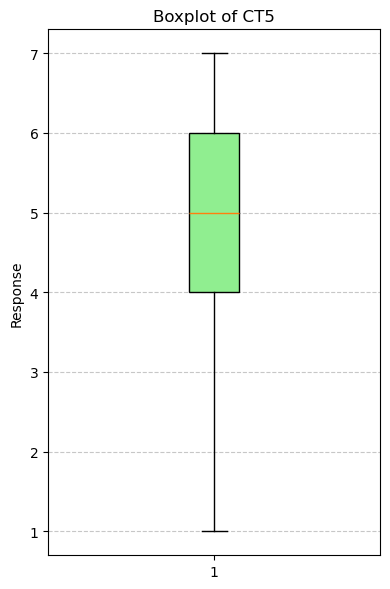

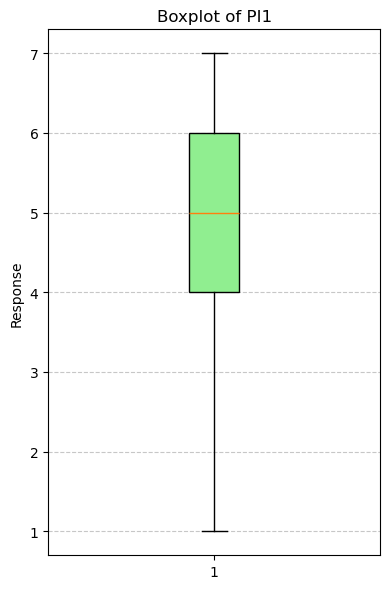

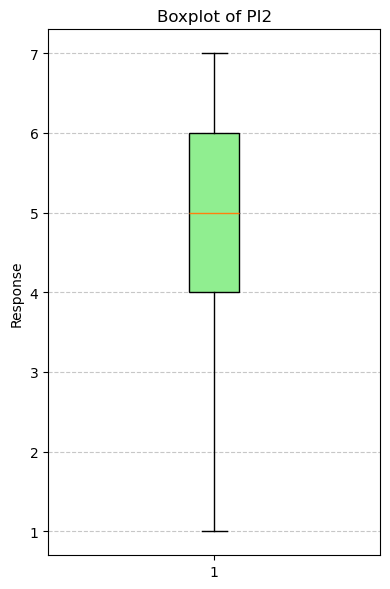

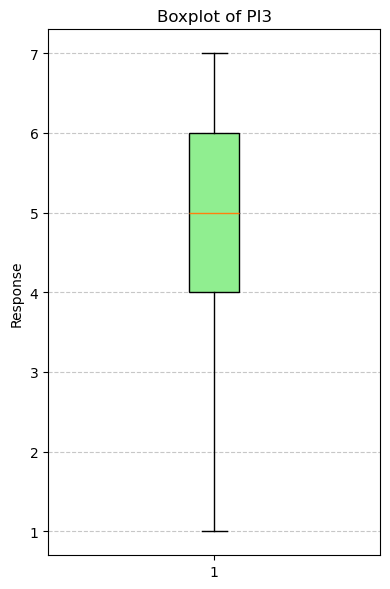

In [9]:
# Set up vertical boxplots
for var in ordinal_vars:
    plt.figure(figsize=(4, 6))
    plt.boxplot(df[var].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen'))
    plt.title(f'Boxplot of {var}')
    plt.ylabel('Response')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [10]:
# Create a copy of the dataset to clean
df_cleaned = df.copy()

# Loop through ordinal variables and remove outliers using IQR
for var in ordinal_vars:
    Q1 = df_cleaned[var].quantile(0.25)
    Q3 = df_cleaned[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mask out the outliers
    df_cleaned = df_cleaned[(df_cleaned[var] >= lower_bound) & (df_cleaned[var] <= upper_bound)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")

df = df_cleaned

Original dataset size: 198
Cleaned dataset size: 140


In [11]:
# Generate correlation matrix
correlation_matrix = df_cleaned[ordinal_vars].corr(method='pearson').round(2)

# Convert upper triangle to a flat styled table
correlation_table = []

for i, var1 in enumerate(correlation_matrix.columns):
    for j, var2 in enumerate(correlation_matrix.columns):
        if j > i:
            correlation_table.append({
                'Variable': var1,
                'Correlated With': var2,
                'Pearson r': correlation_matrix.loc[var1, var2]
            })

# Create DataFrame
correlation_df = pd.DataFrame(correlation_table)

# Show table in Python
print("=== Correlation Pairs Table ===")
print(correlation_df)

=== Correlation Pairs Table ===
    Variable Correlated With  Pearson r
0        Age             SP1       0.13
1        Age             SP2       0.40
2        Age             AT1       0.04
3        Age             AT2       0.12
4        Age             AT3       0.10
5        Age             AT4       0.11
6        Age             CT1       0.18
7        Age             CT2       0.21
8        Age             CT3       0.11
9        Age             CT4       0.22
10       Age             CT5       0.16
11       Age             PI1       0.15
12       Age             PI2       0.13
13       Age             PI3       0.14
14       SP1             SP2       0.44
15       SP1             AT1       0.28
16       SP1             AT2       0.28
17       SP1             AT3       0.33
18       SP1             AT4       0.48
19       SP1             CT1       0.40
20       SP1             CT2       0.43
21       SP1             CT3       0.38
22       SP1             CT4       0.27
23      

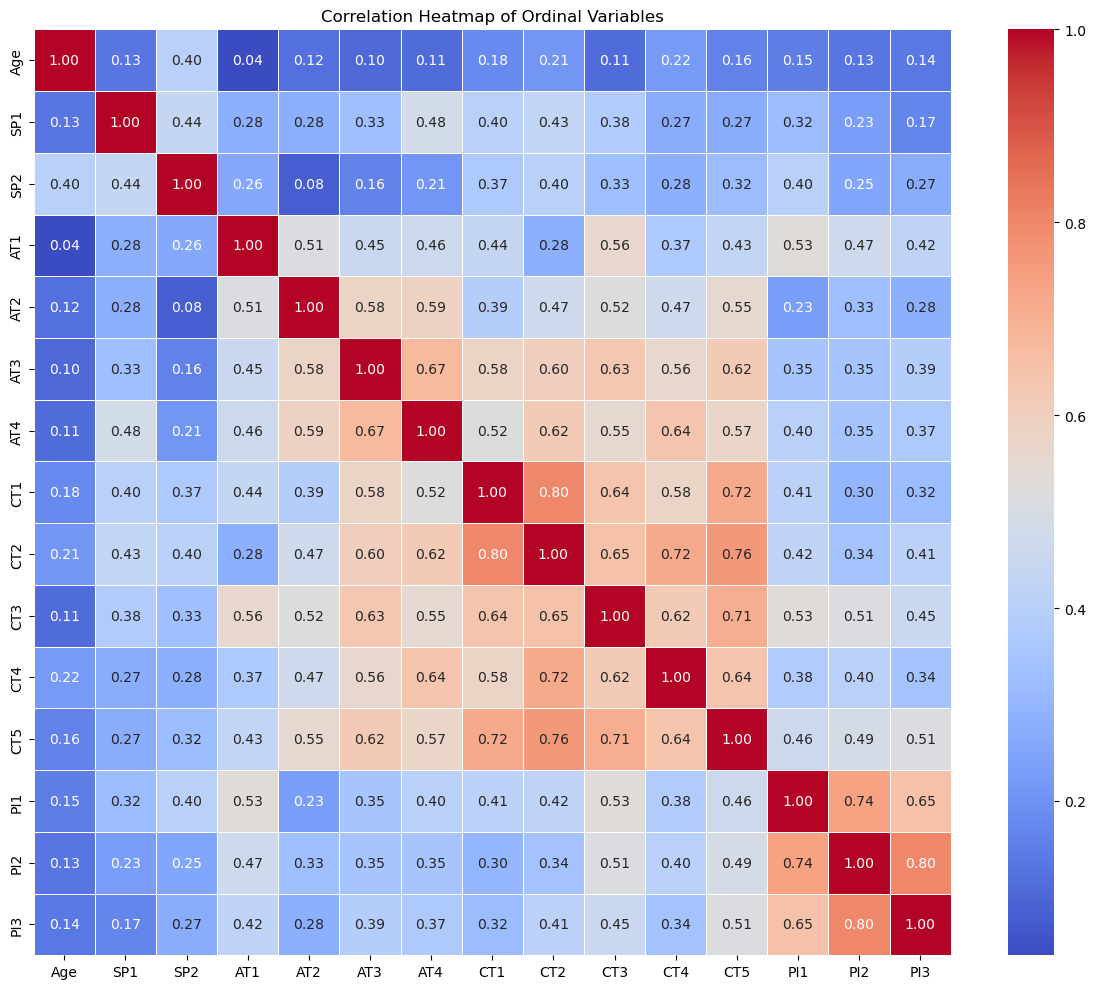

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Ordinal Variables')
plt.tight_layout()
plt.show()

In [13]:
# Compute correlation and p-value for each unique pair
corr_pval_table = []

for i, var1 in enumerate(ordinal_vars):
    for j, var2 in enumerate(ordinal_vars):
        if j > i:
            r, p = pearsonr(df_cleaned[var1], df_cleaned[var2])
            corr_pval_table.append({
                'Variable': var1,
                'Correlated With': var2,
                'Pearson r': round(r, 2),
                'p-value': round(p, 4),
                'Significance': 'Yes' if p < 0.05 else 'No'
            })

# Convert to DataFrame
corr_pval_df = pd.DataFrame(corr_pval_table)

# Show in console
print("=== Correlation with Significance Table ===")
print(corr_pval_df)


=== Correlation with Significance Table ===
    Variable Correlated With  Pearson r  p-value Significance
0        Age             SP1       0.13   0.1353           No
1        Age             SP2       0.40   0.0000          Yes
2        Age             AT1       0.04   0.6268           No
3        Age             AT2       0.12   0.1529           No
4        Age             AT3       0.10   0.2481           No
5        Age             AT4       0.11   0.2128           No
6        Age             CT1       0.18   0.0334          Yes
7        Age             CT2       0.21   0.0131          Yes
8        Age             CT3       0.11   0.1813           No
9        Age             CT4       0.22   0.0105          Yes
10       Age             CT5       0.16   0.0629           No
11       Age             PI1       0.15   0.0740           No
12       Age             PI2       0.13   0.1120           No
13       Age             PI3       0.14   0.1040           No
14       SP1             S

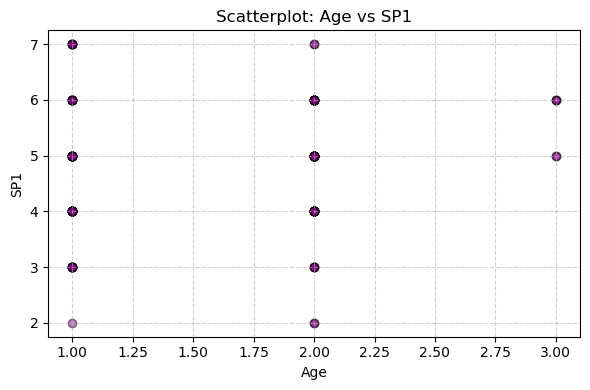

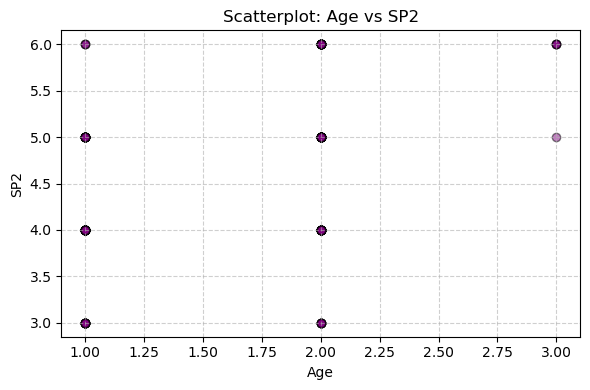

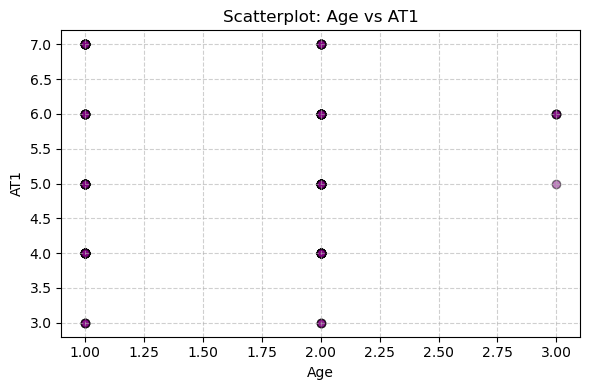

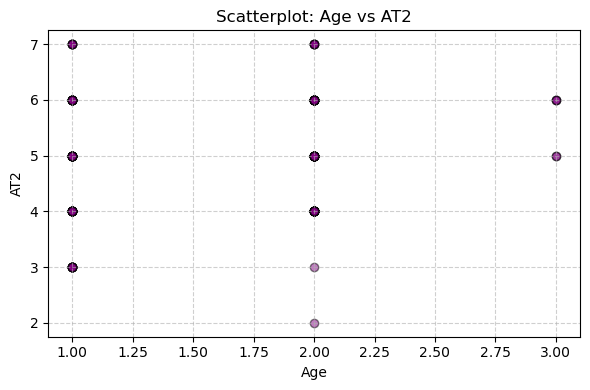

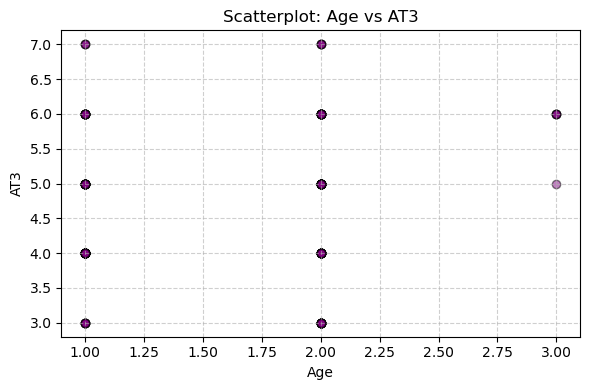

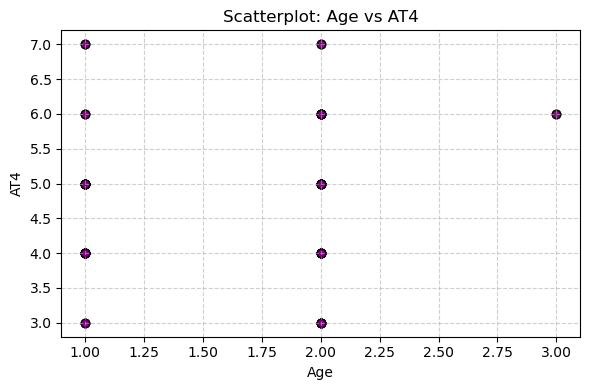

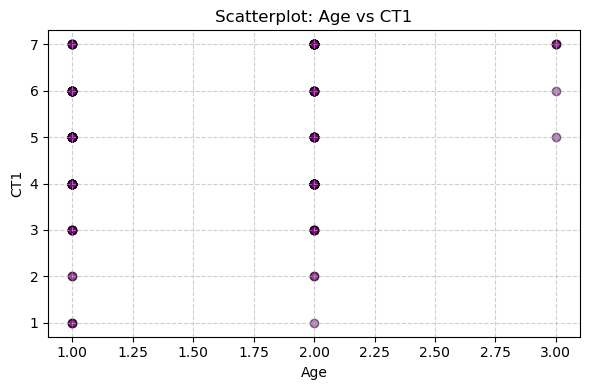

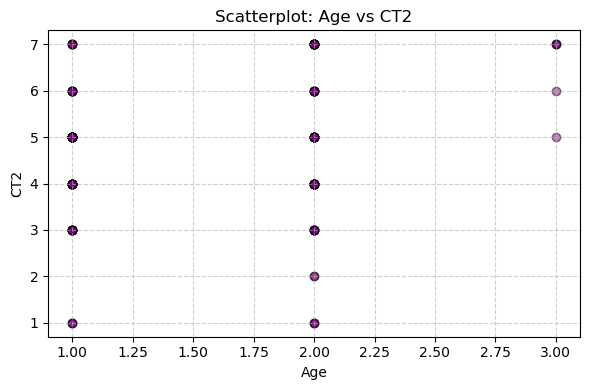

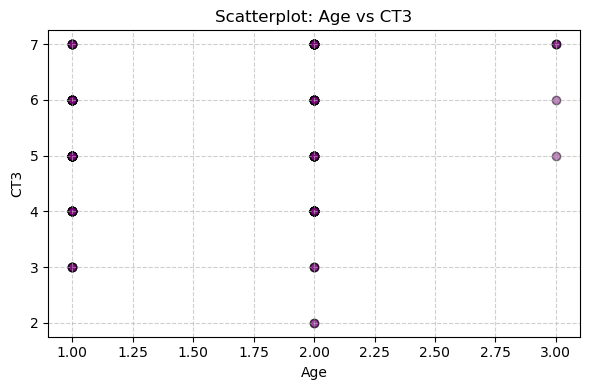

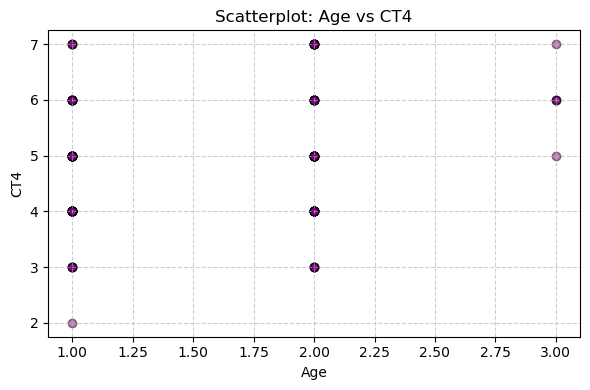

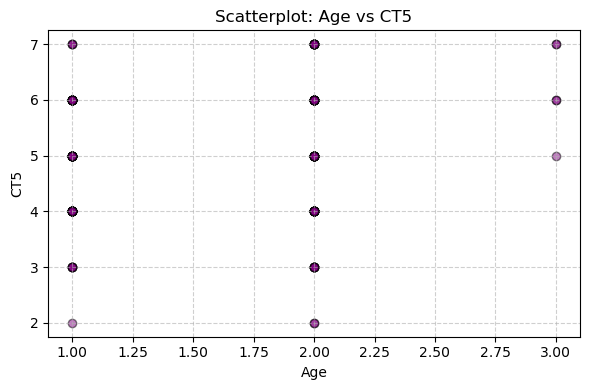

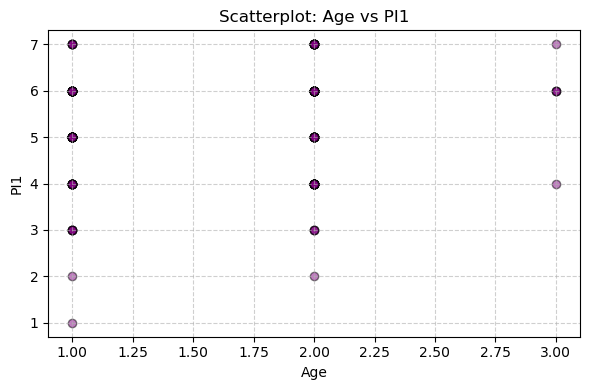

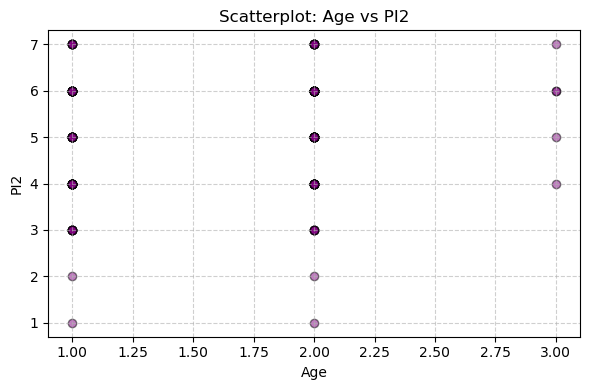

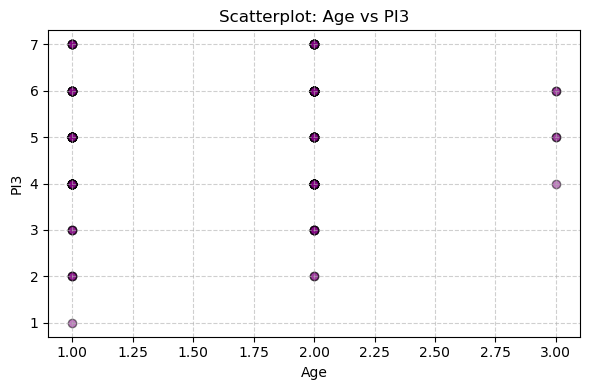

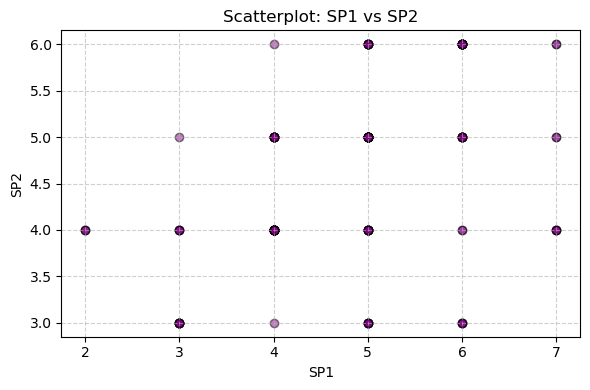

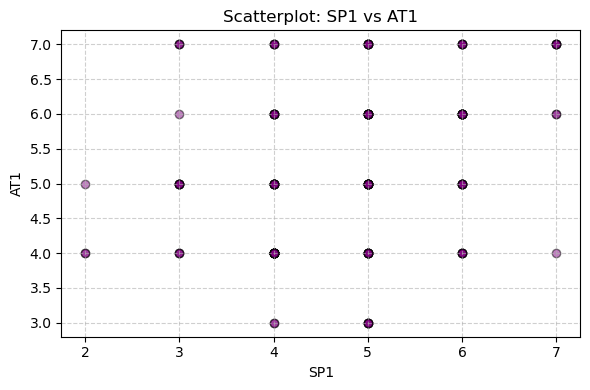

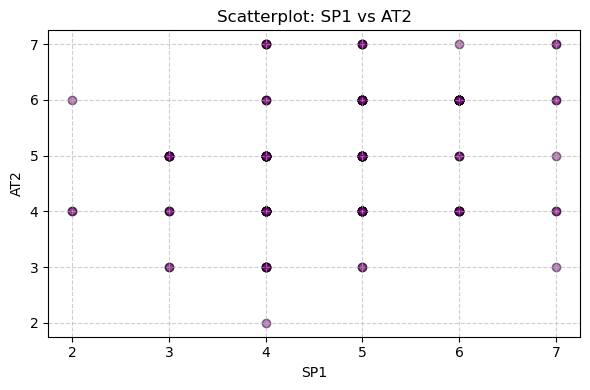

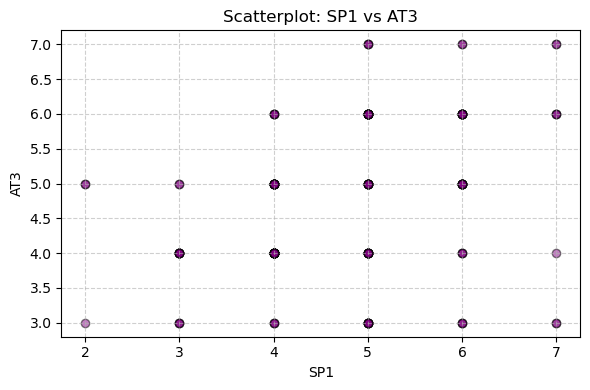

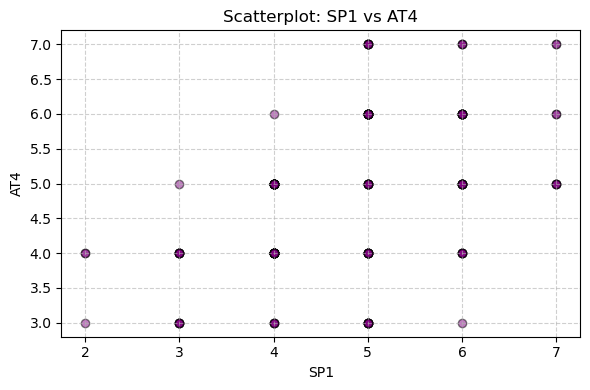

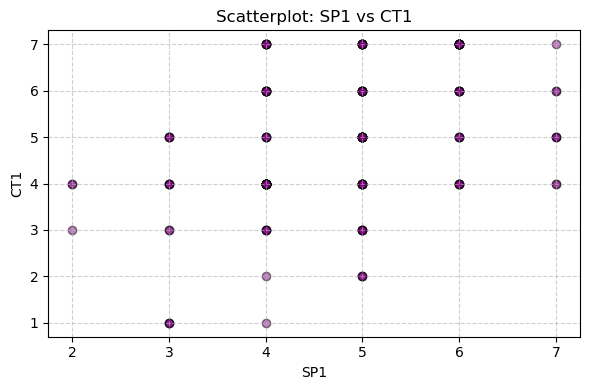

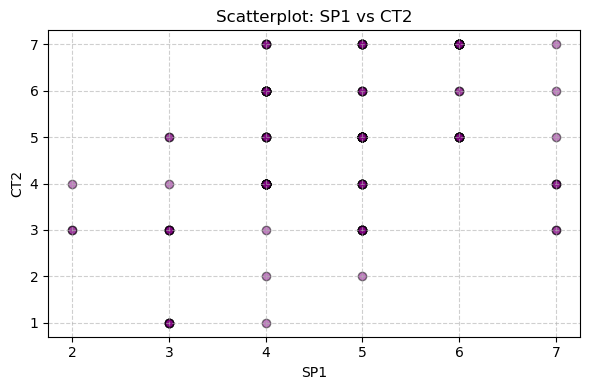

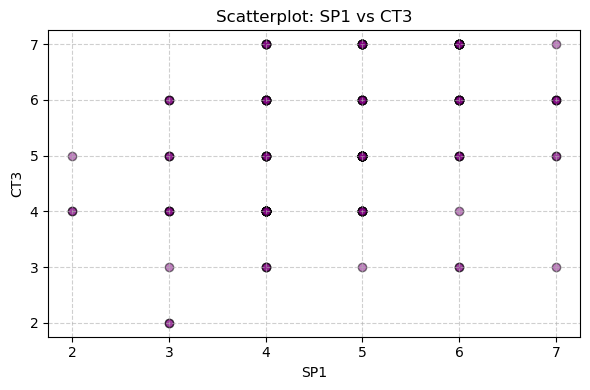

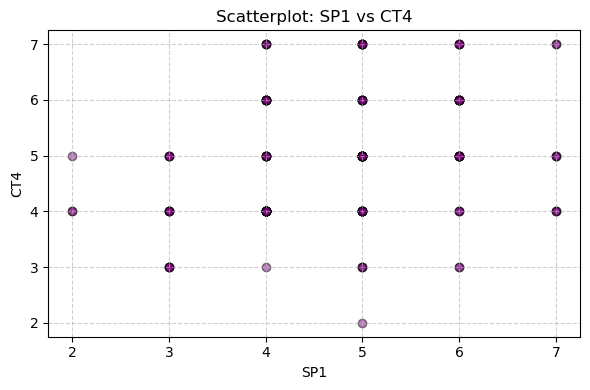

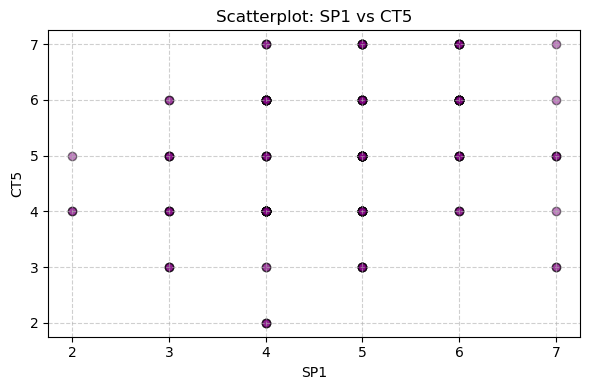

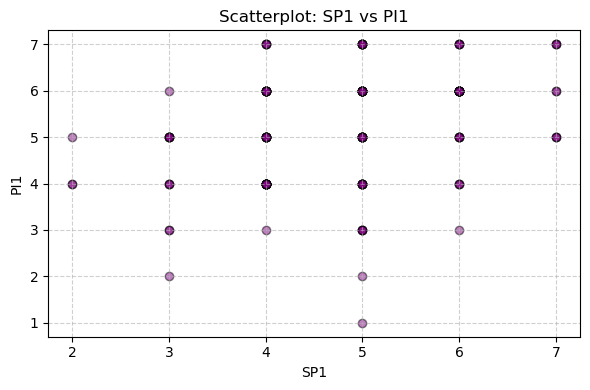

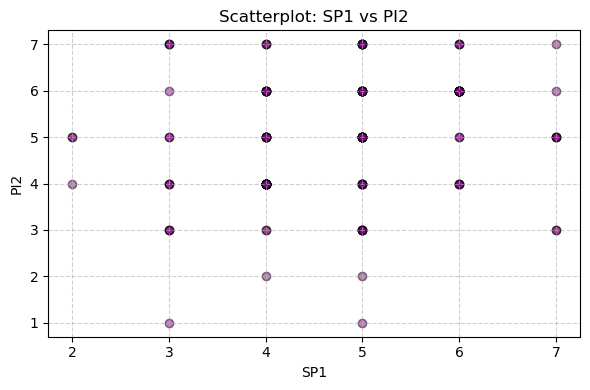

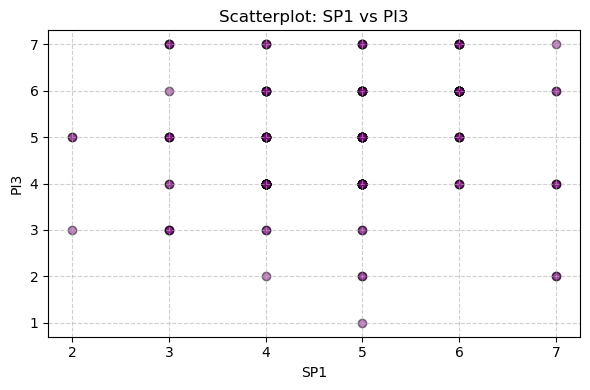

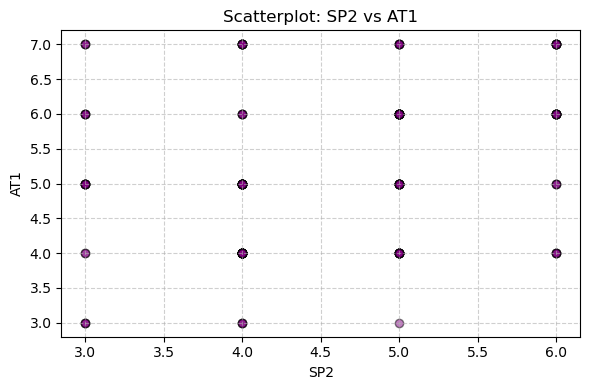

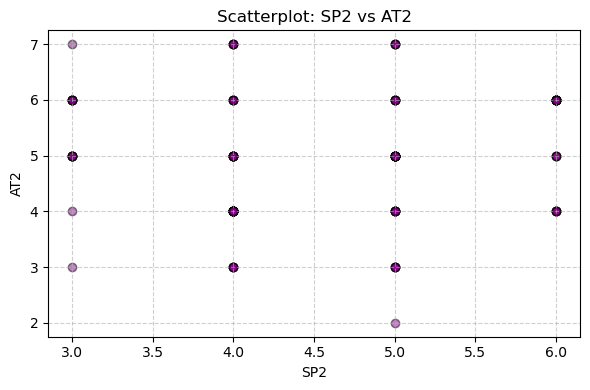

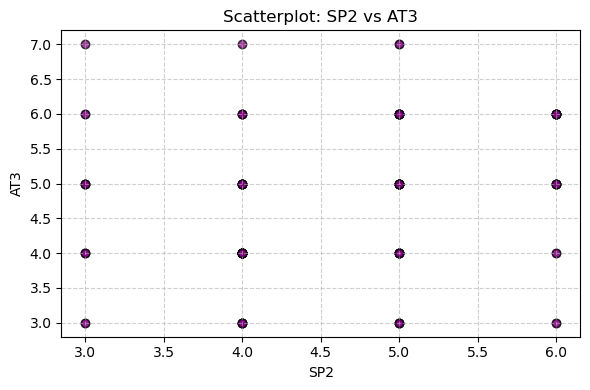

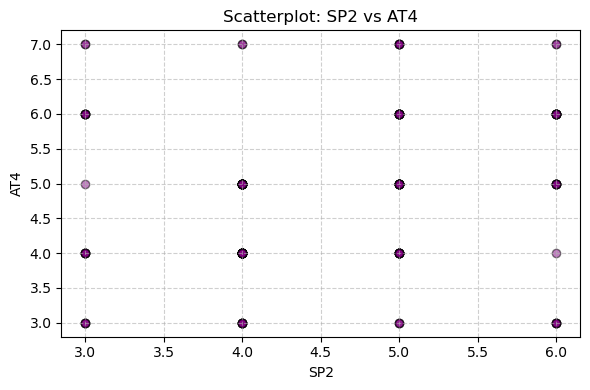

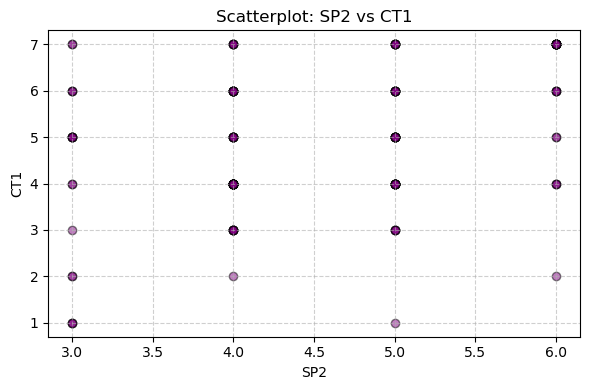

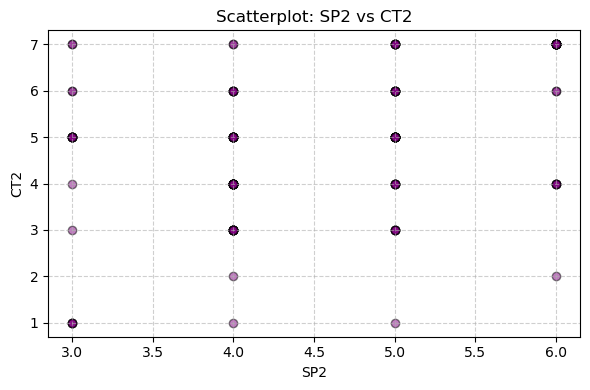

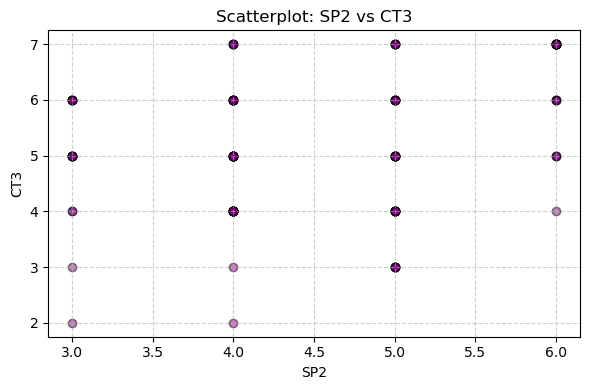

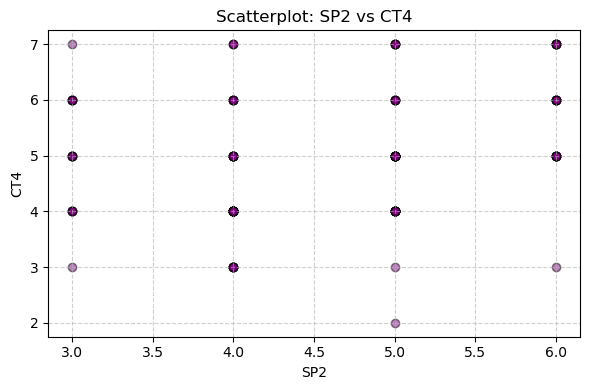

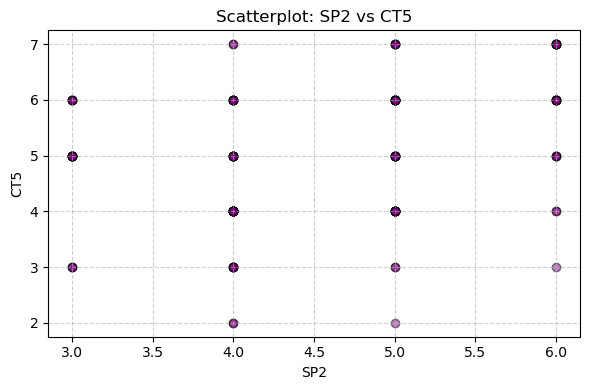

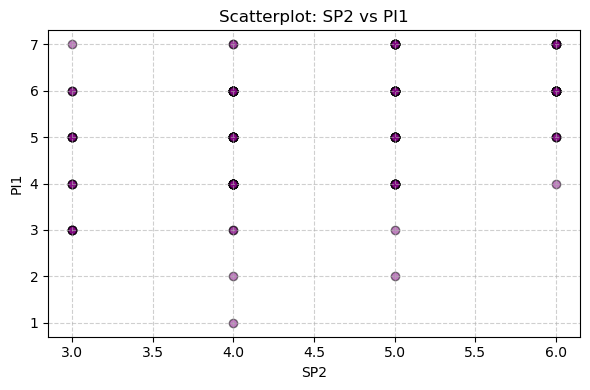

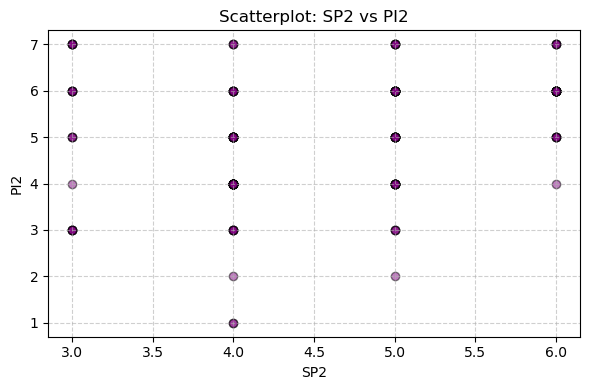

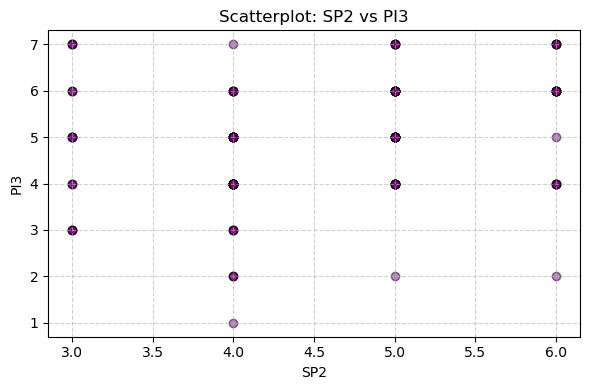

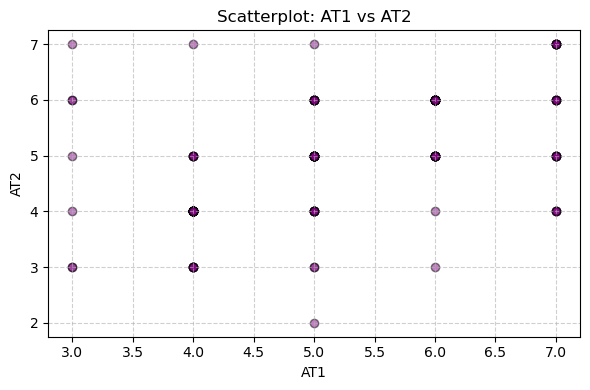

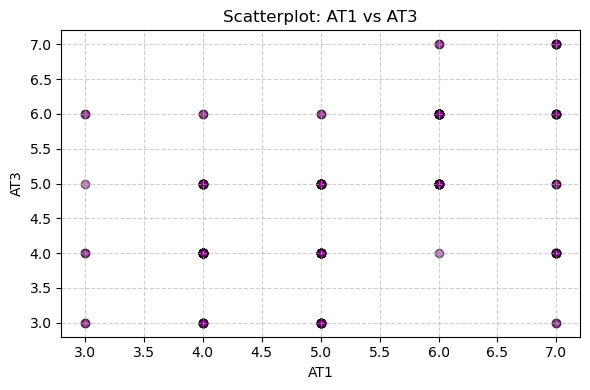

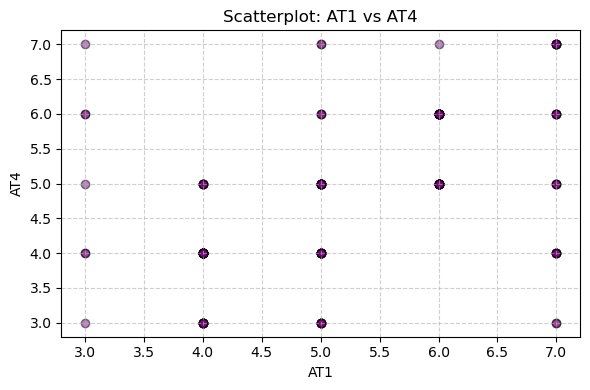

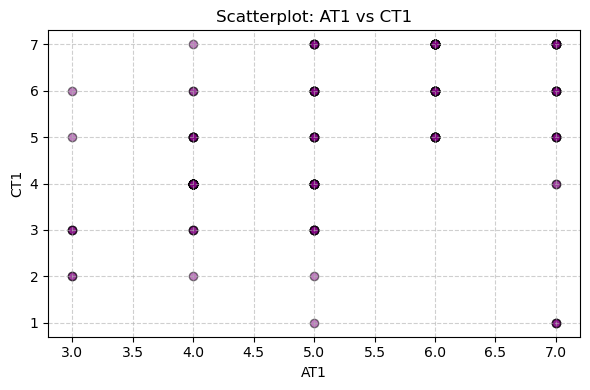

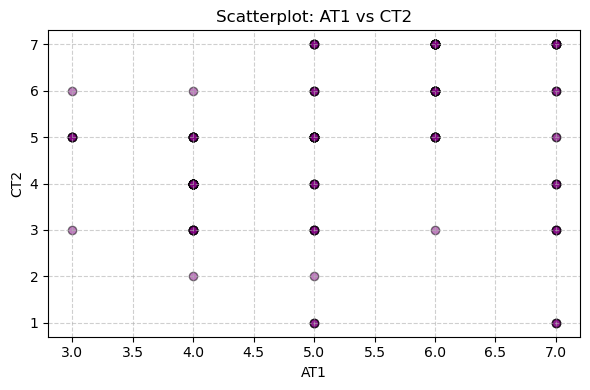

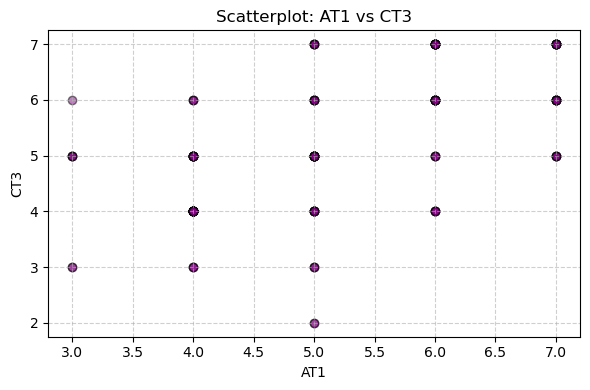

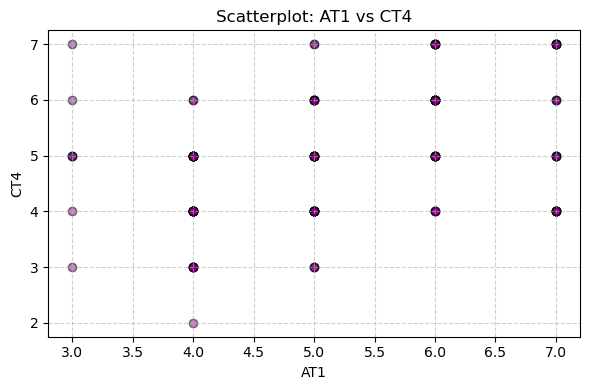

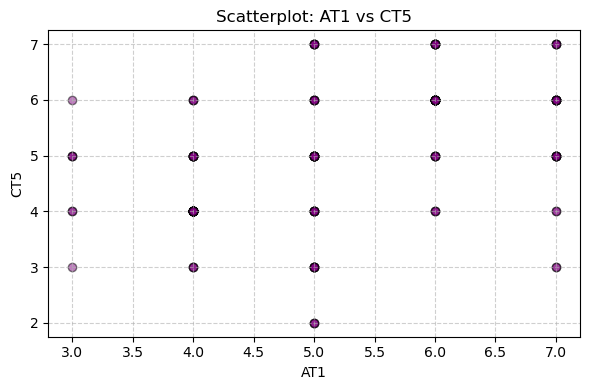

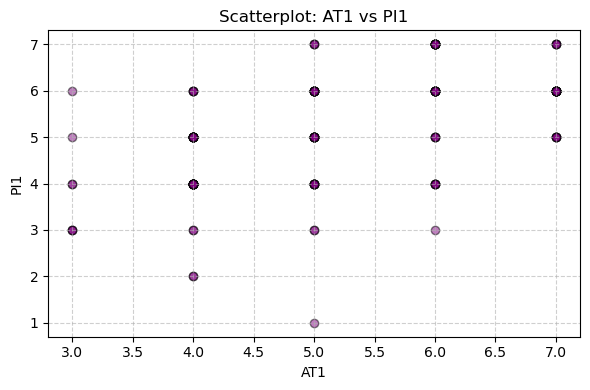

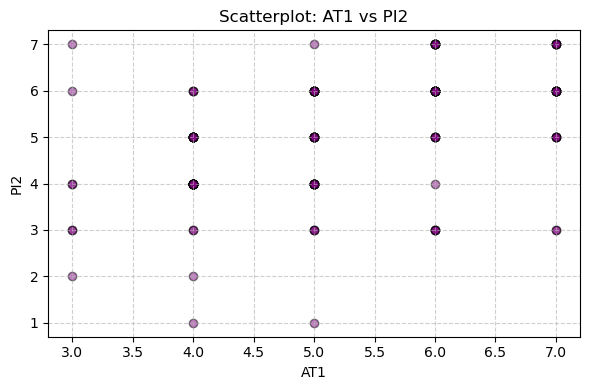

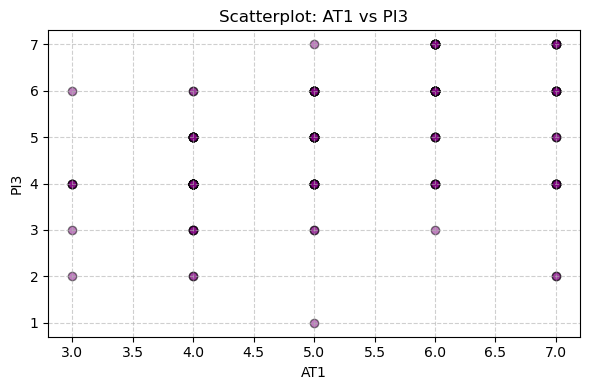

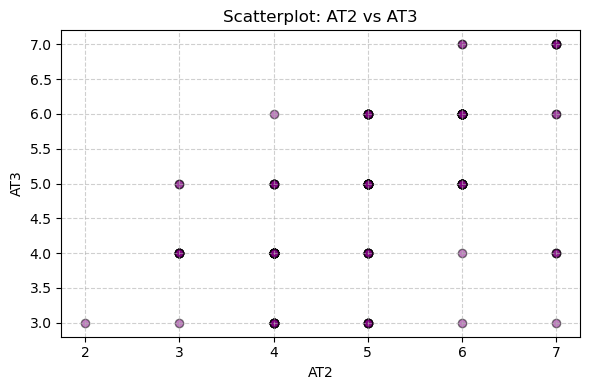

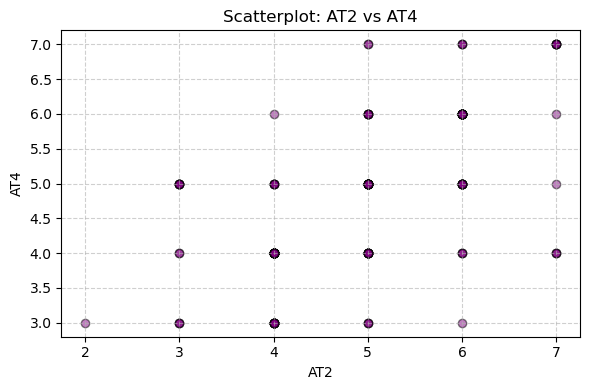

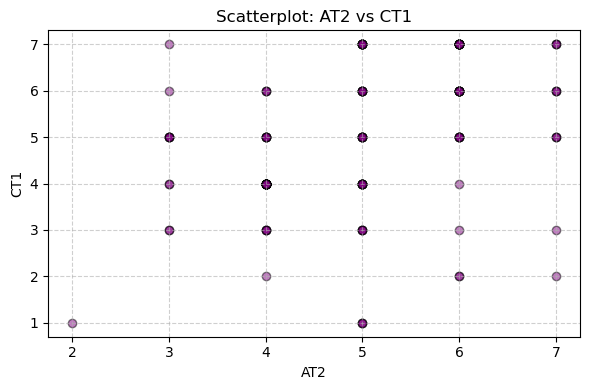

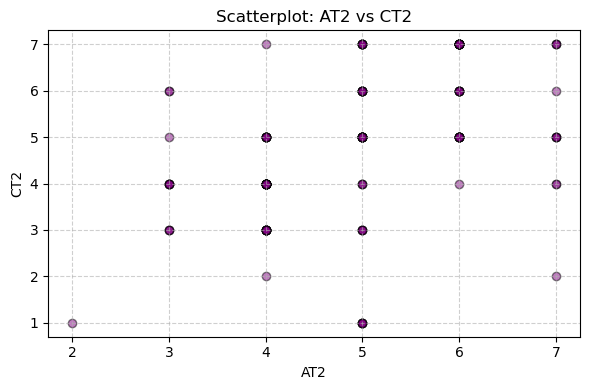

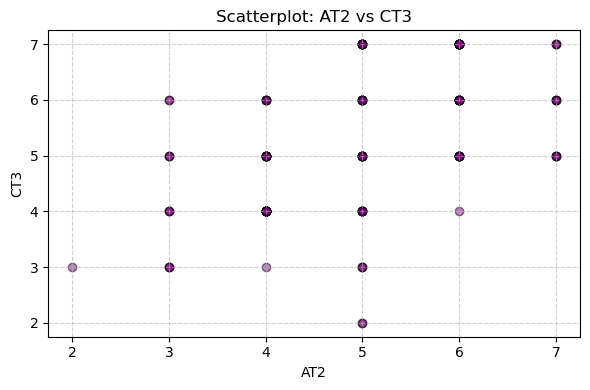

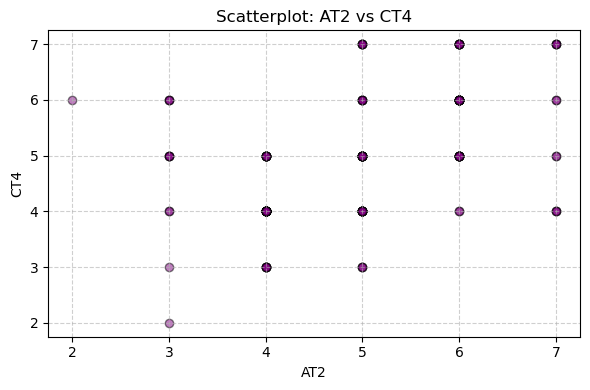

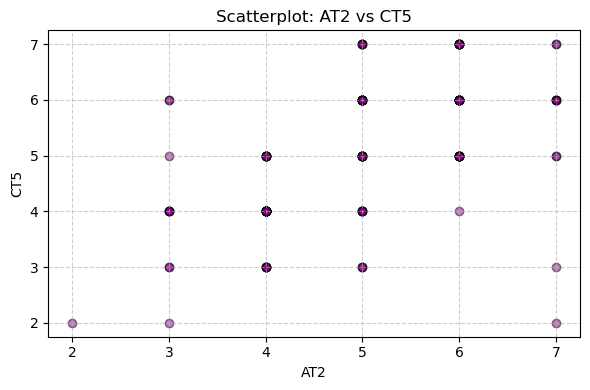

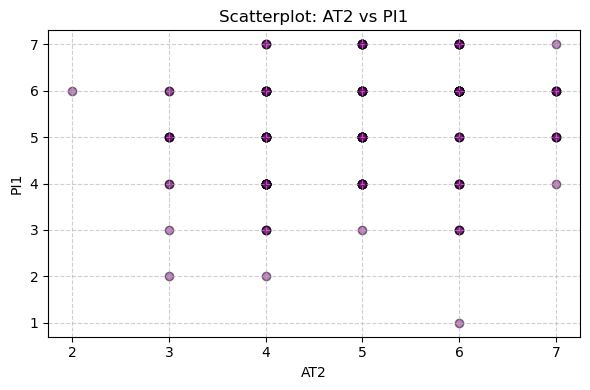

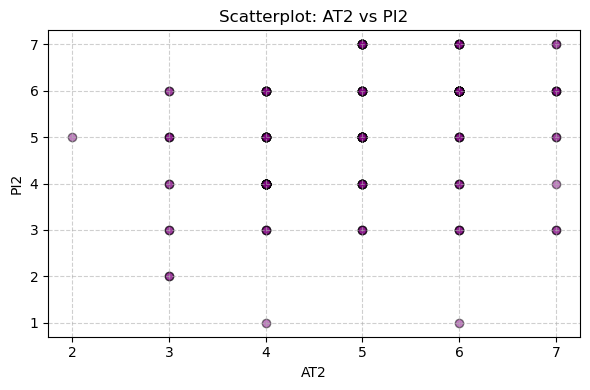

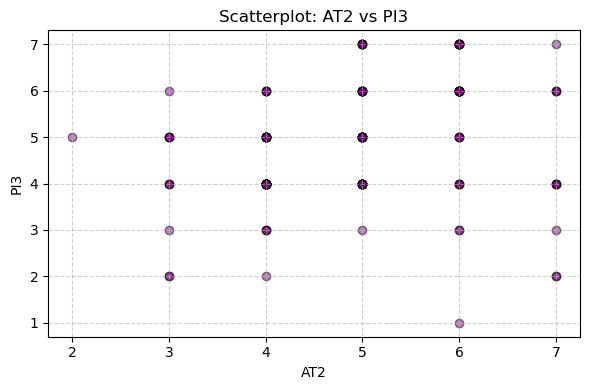

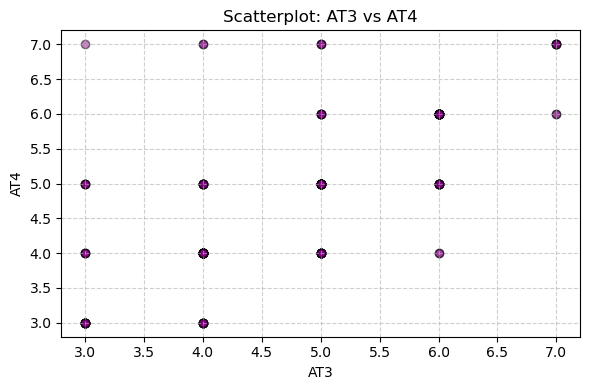

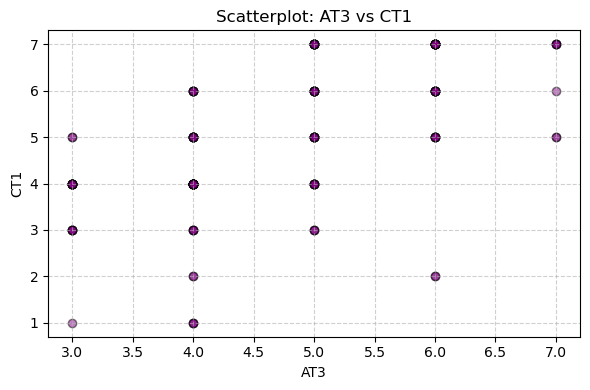

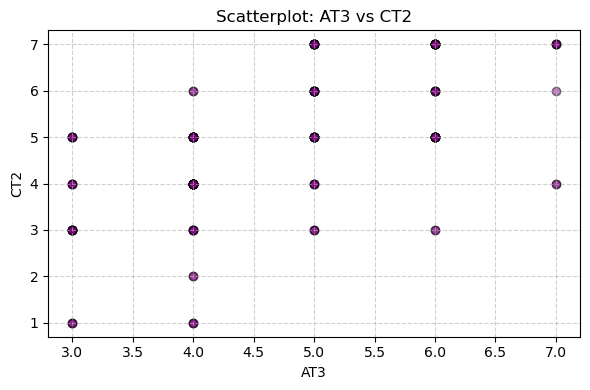

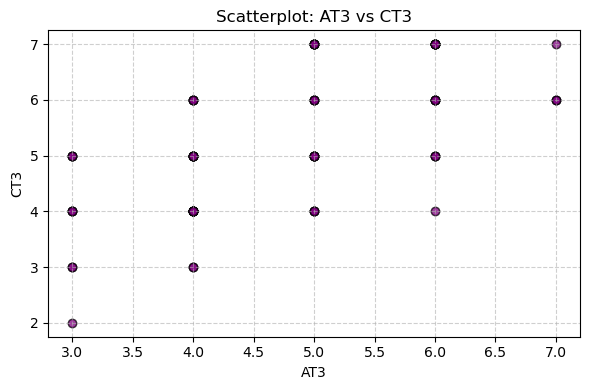

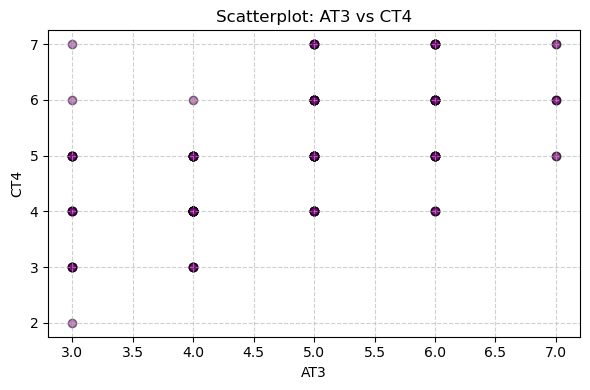

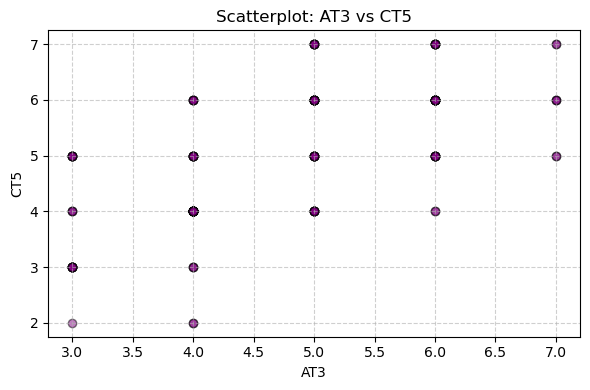

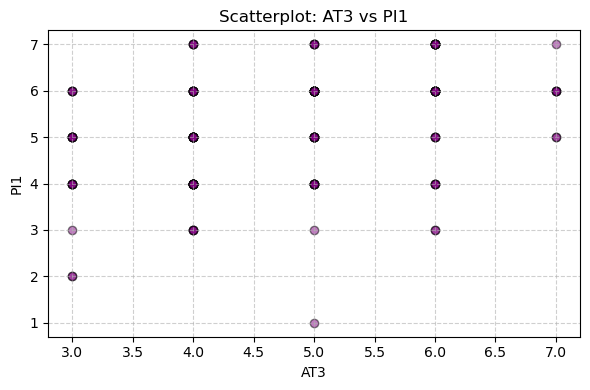

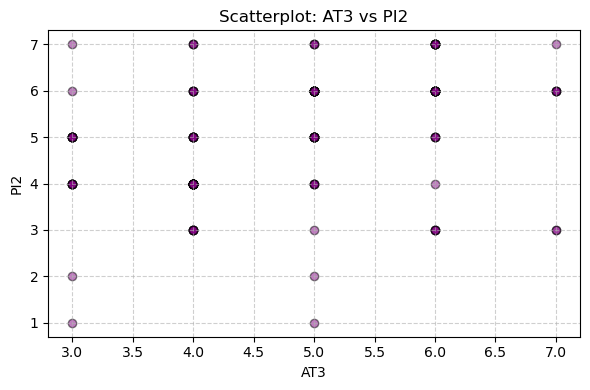

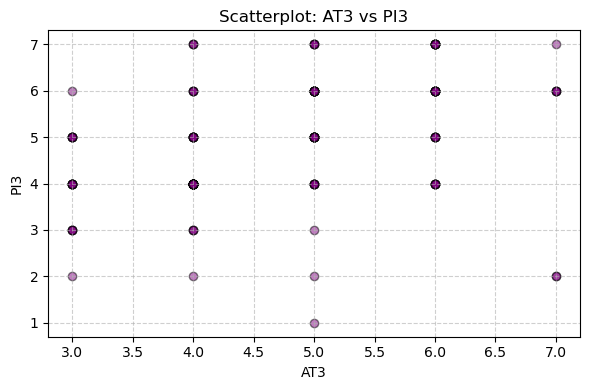

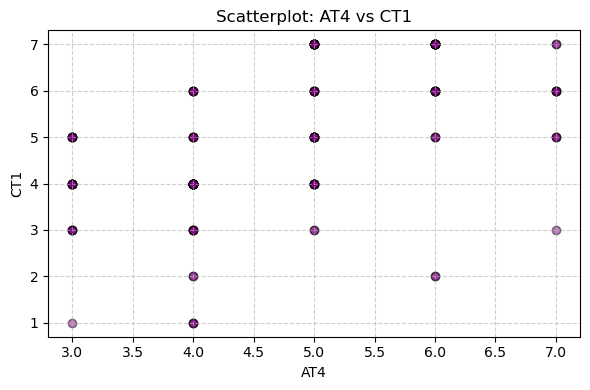

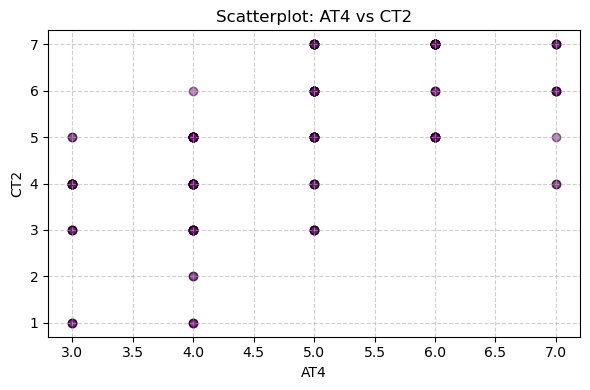

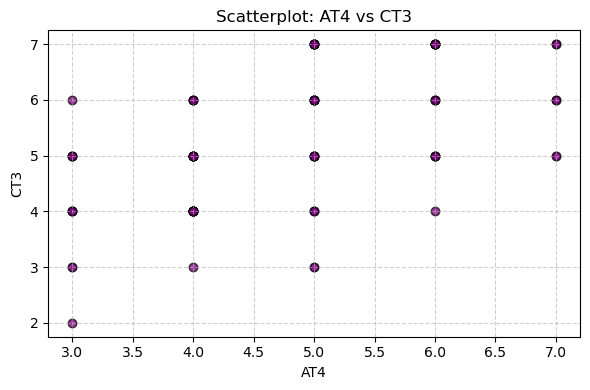

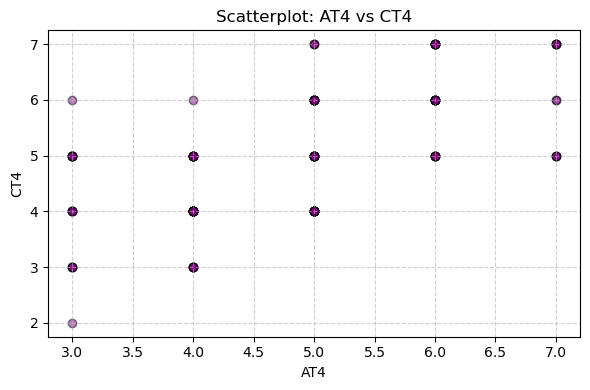

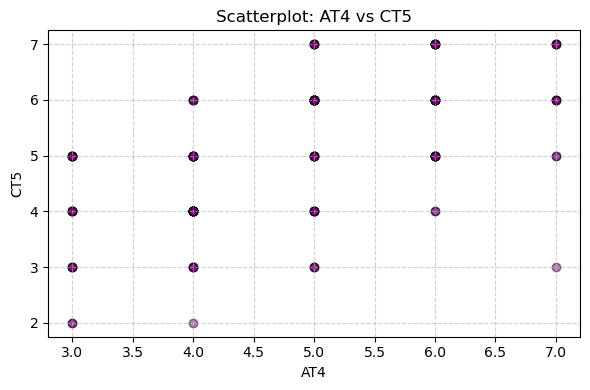

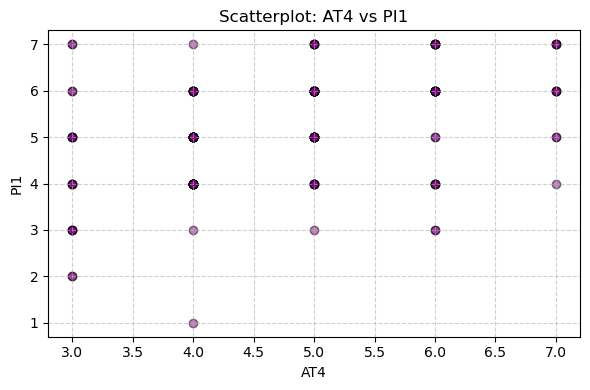

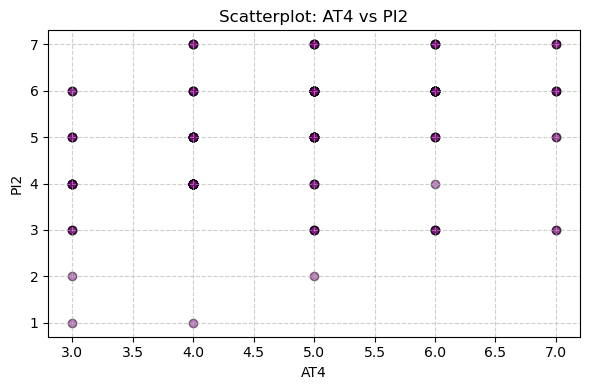

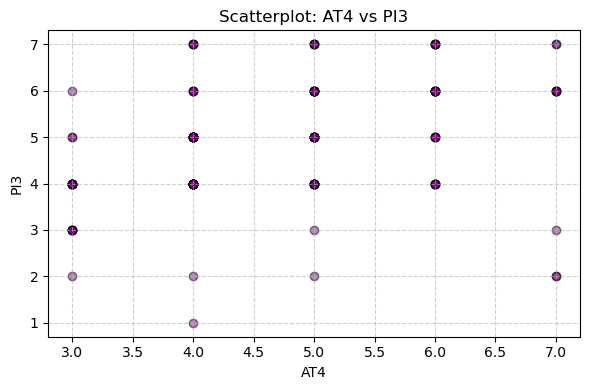

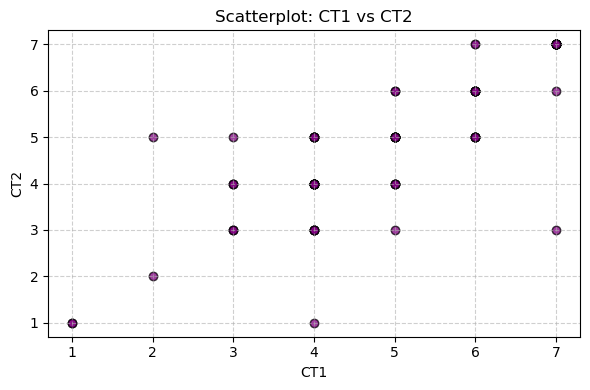

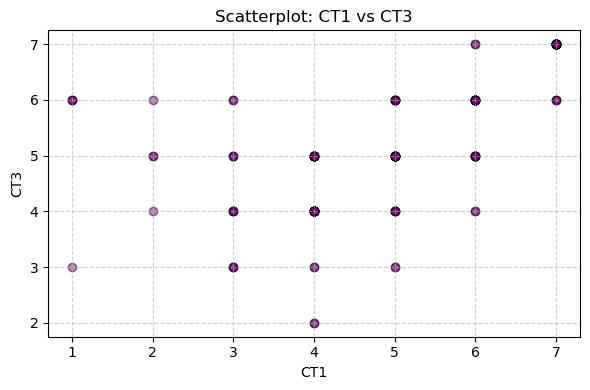

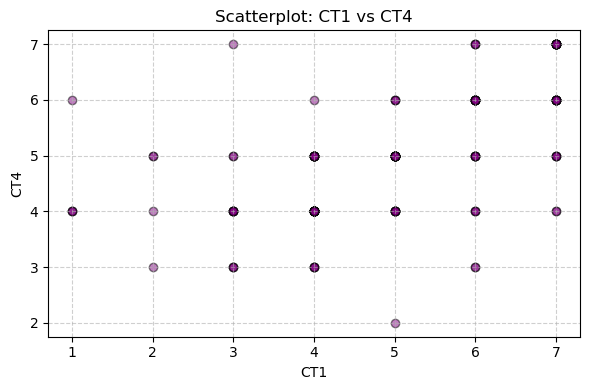

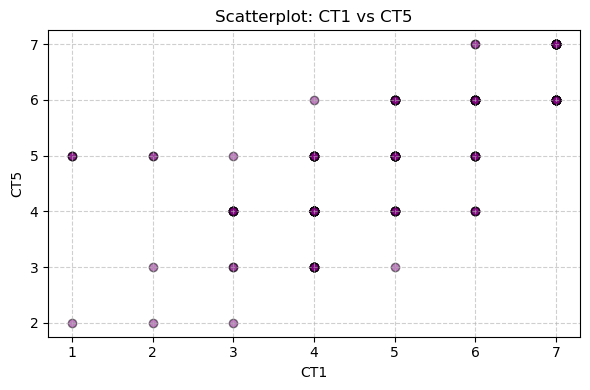

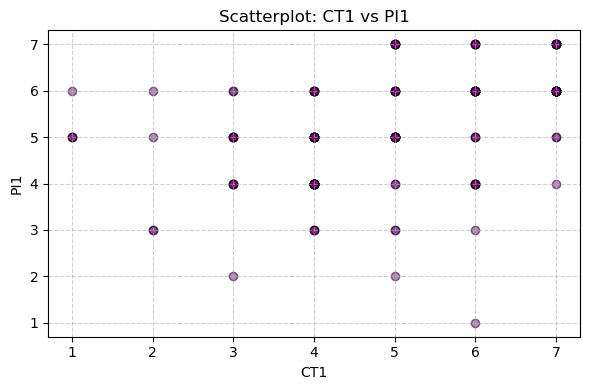

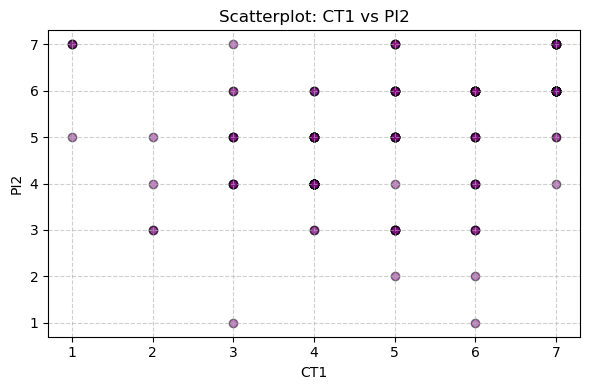

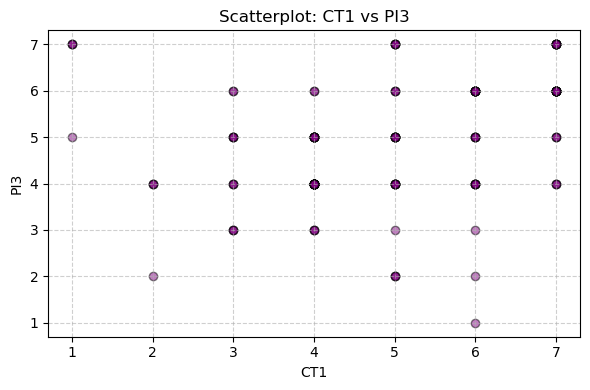

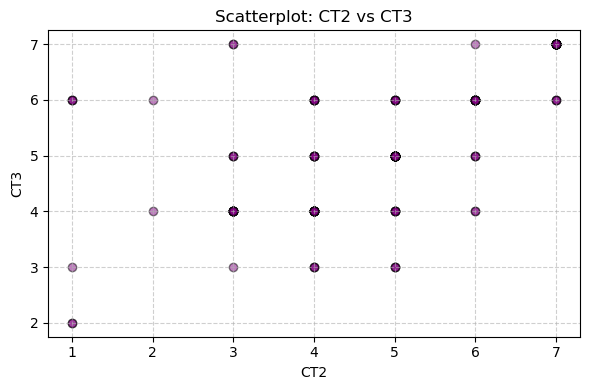

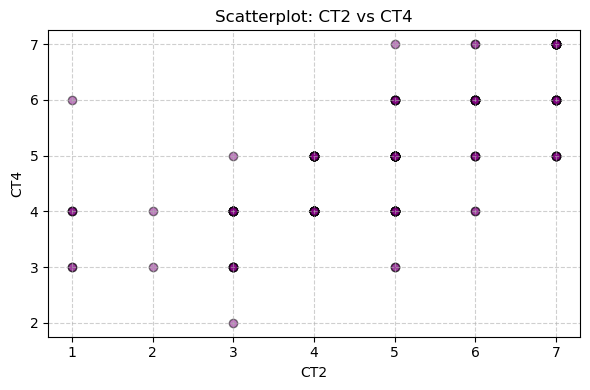

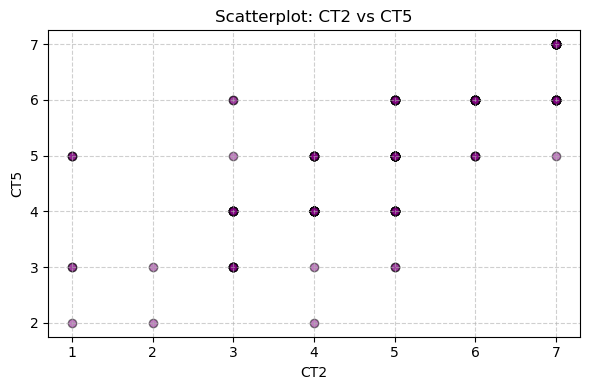

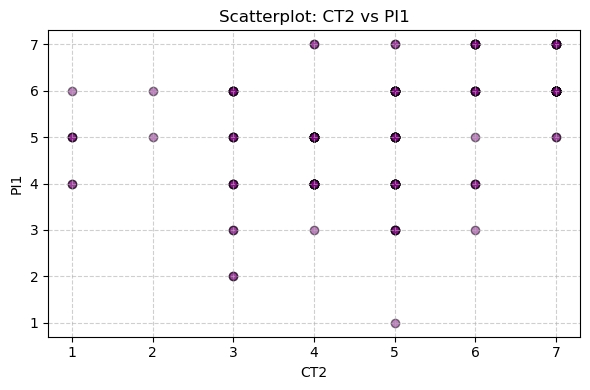

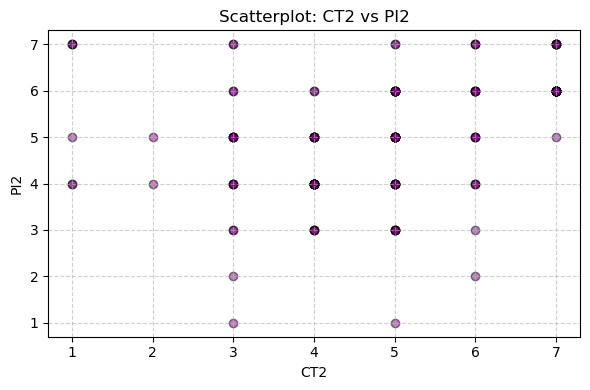

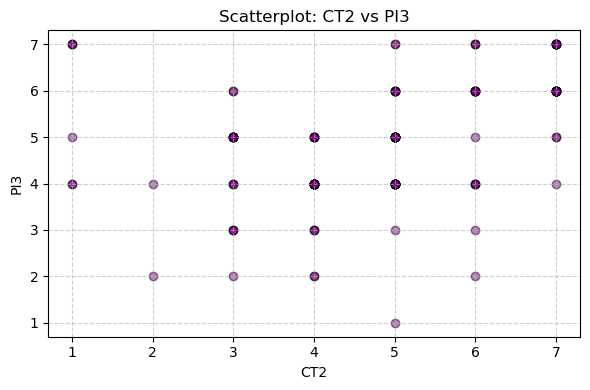

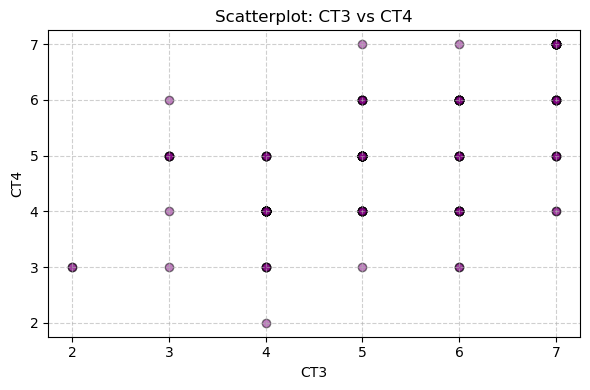

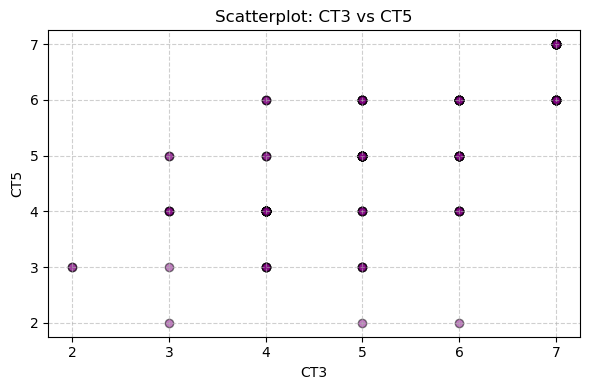

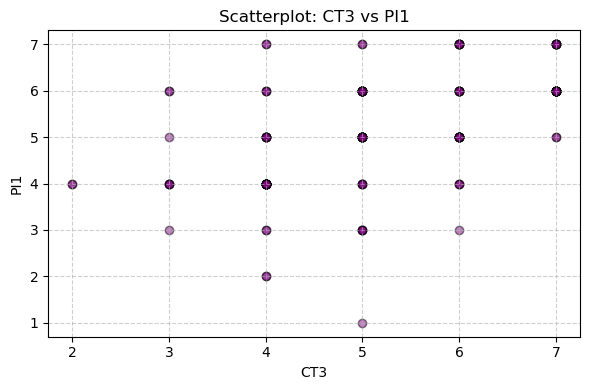

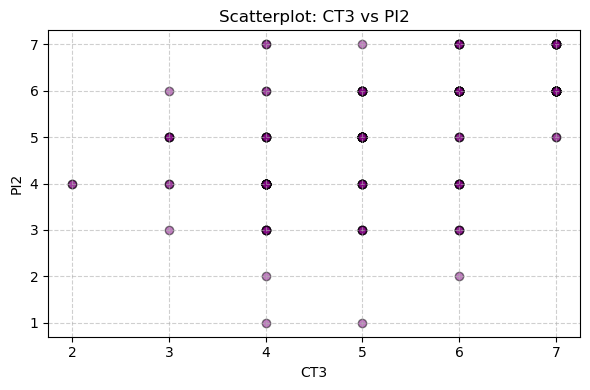

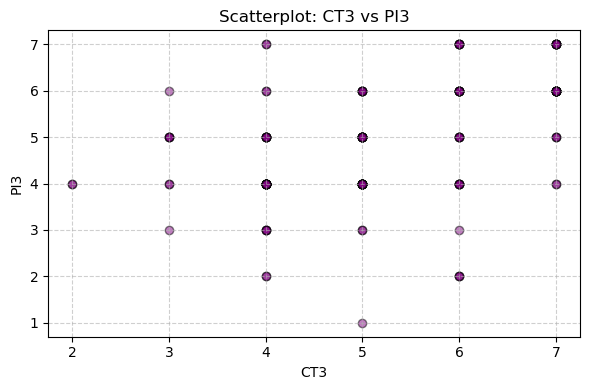

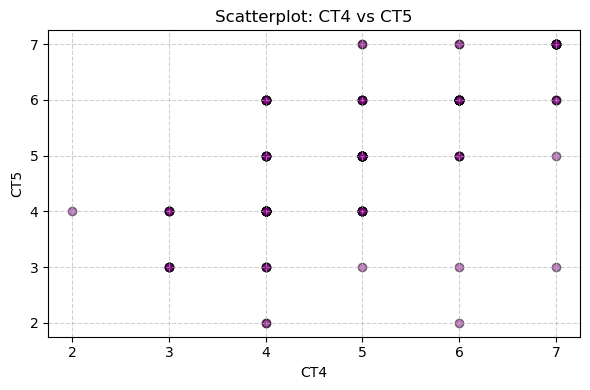

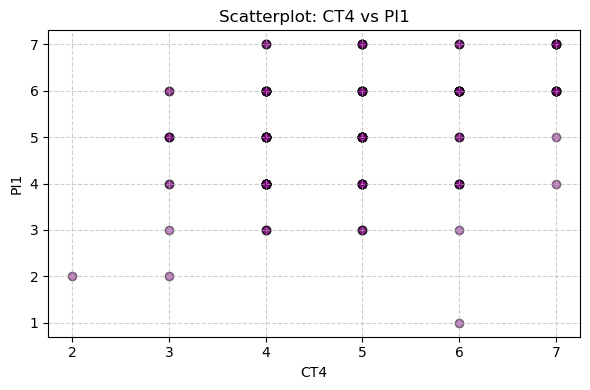

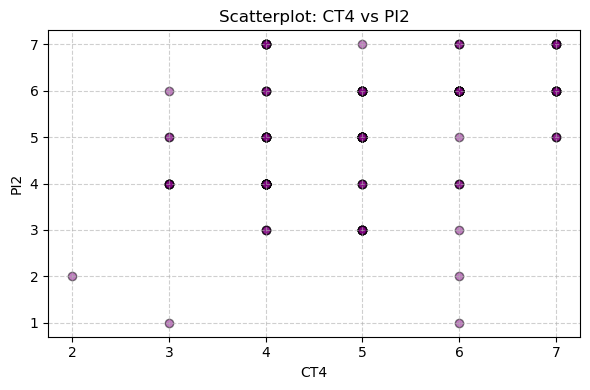

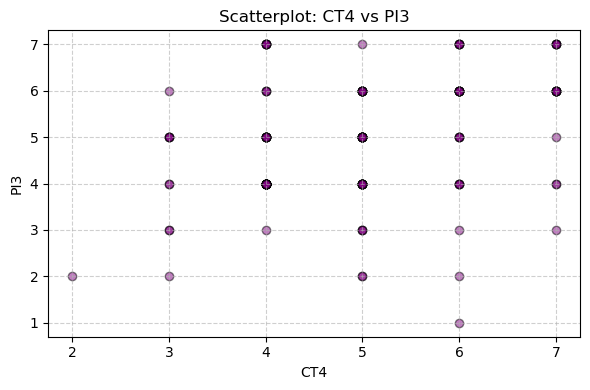

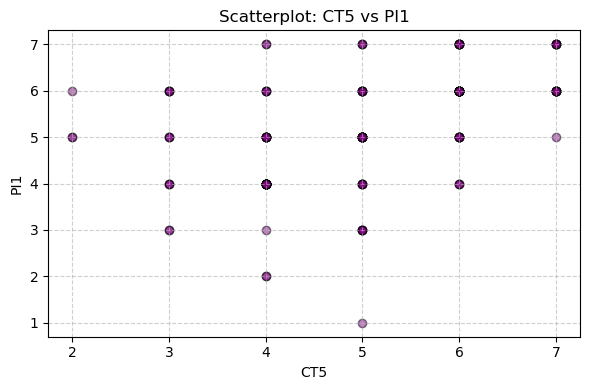

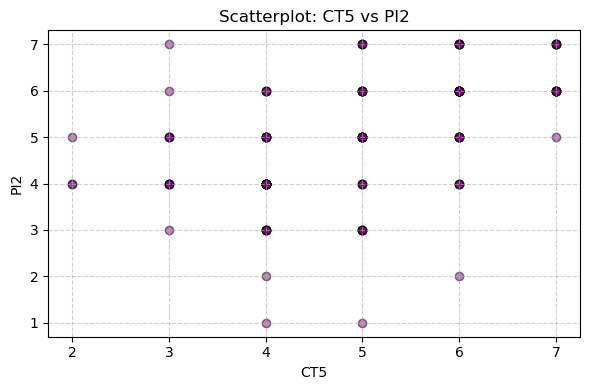

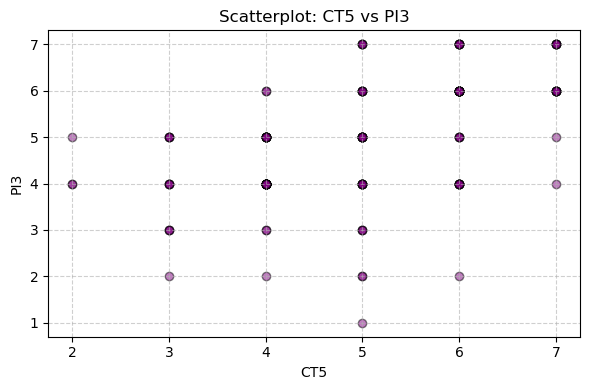

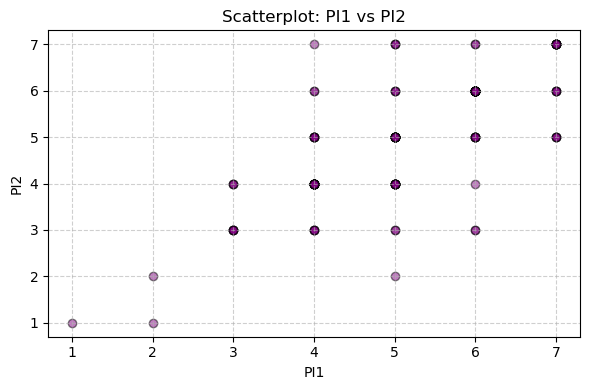

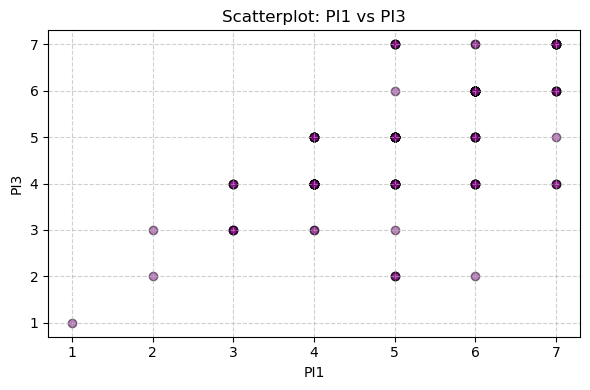

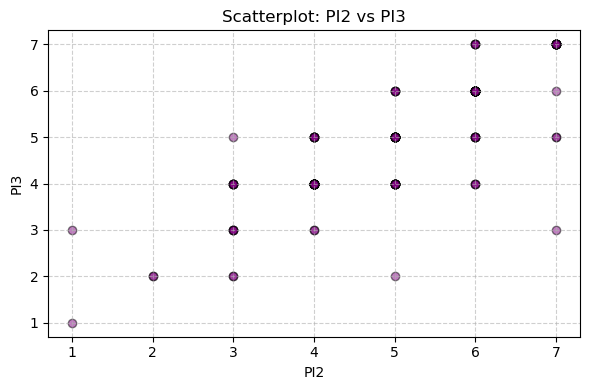

In [14]:
# Create scatterplots for all unique pairs
for i, var1 in enumerate(ordinal_vars):
    for j, var2 in enumerate(ordinal_vars):
        if j > i:
            plt.figure(figsize=(6, 4))
            plt.scatter(df_cleaned[var1], df_cleaned[var2], alpha=0.5, color='purple', edgecolors='k')
            plt.title(f'Scatterplot: {var1} vs {var2}')
            plt.xlabel(var1)
            plt.ylabel(var2)
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.tight_layout()
            plt.show()
